# Исследование объявлений о продаже квартир

__Цель:__ провести исследовательский анализ данных и установить параметры, влияющие на цену объектов. 

__Перечень задач:__

1. <b>Открыть файл с данными и изучить общую информацию</b>

2. <b>Провести предобработку данных:</b>
   1. Найти, изучить и заполнить (там где это возможно) пропущенные значения
   2. Преобразовать типы данных там, где это необходимо
   3. Изучить аномальные значения и устранить 
   
3. <b>Добавить в таблицу новые параметры:</b>
   - цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
   - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры (значения — «первый», «последний», «другой»);
   - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений).
   
4. <b>Провести исследовательский анализ данных:</b>
    1. изучить и описать параметры: 
       - общая площадь;
       - жилая площадь;
       - площадь кухни;
       - цена объекта;
       - количество комнат;
       - высота потолков;
       - тип этажа квартиры («первый», «последний», «другой»);
       - общее количество этажей в доме;
       - расстояние до центра города в метрах;
       - расстояние до ближайшего парка
    2. Изучить, как быстро продавались квартиры
    3. Определить факторы, которые больше всего влияют на общую (полную) стоимость объекта.
        Изучить, зависит ли цена от:
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количества комнат;
        - этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год).
    4. Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
    5. Вычислить среднюю стоимость квартиры на разном удалении от центра

### Файл с данными и общая информация

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    print('Что-то пошло не так')

data.shape

(23699, 22)

In [3]:
data.head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Предварительно можно наблюдать аномальные значения: 0 комнат, высота потолков 1 и 100 метров, 60 этажей, общая площадь помещения 900м 

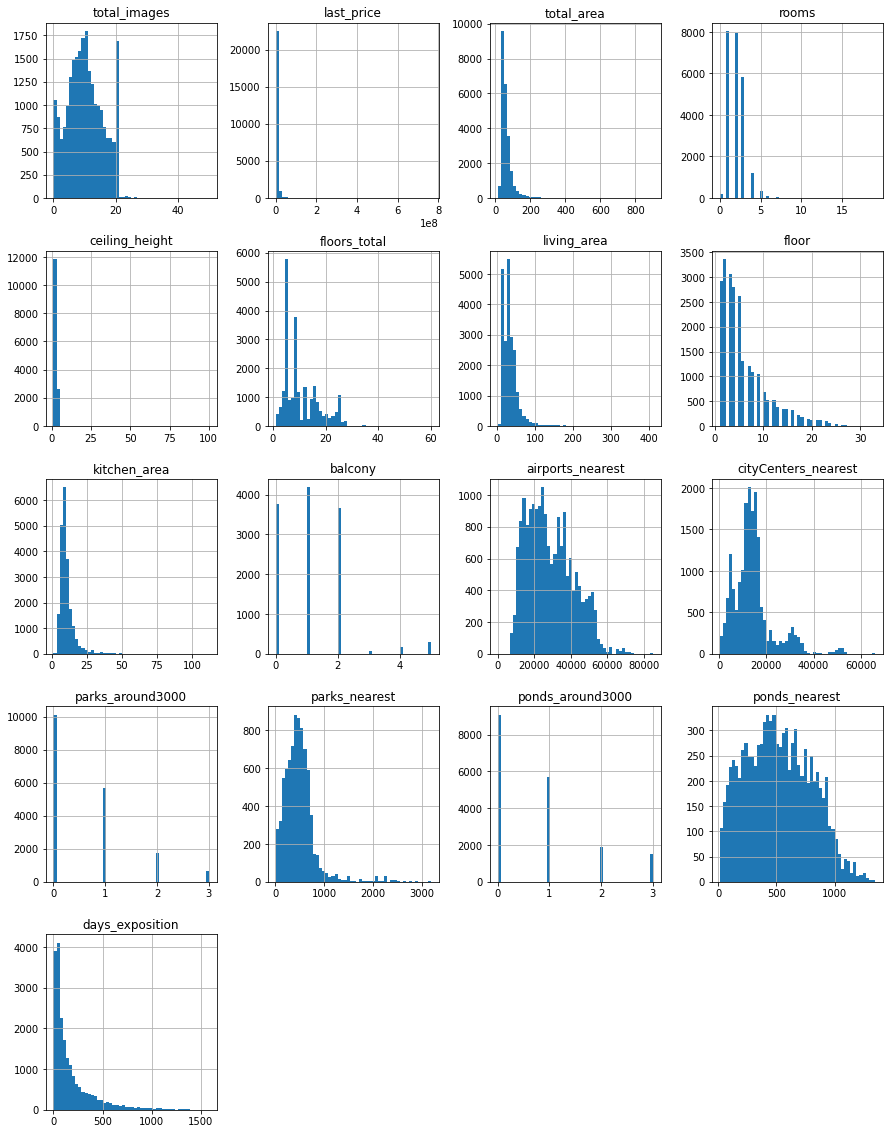

In [6]:
data.hist(figsize=(15,20), bins=50);

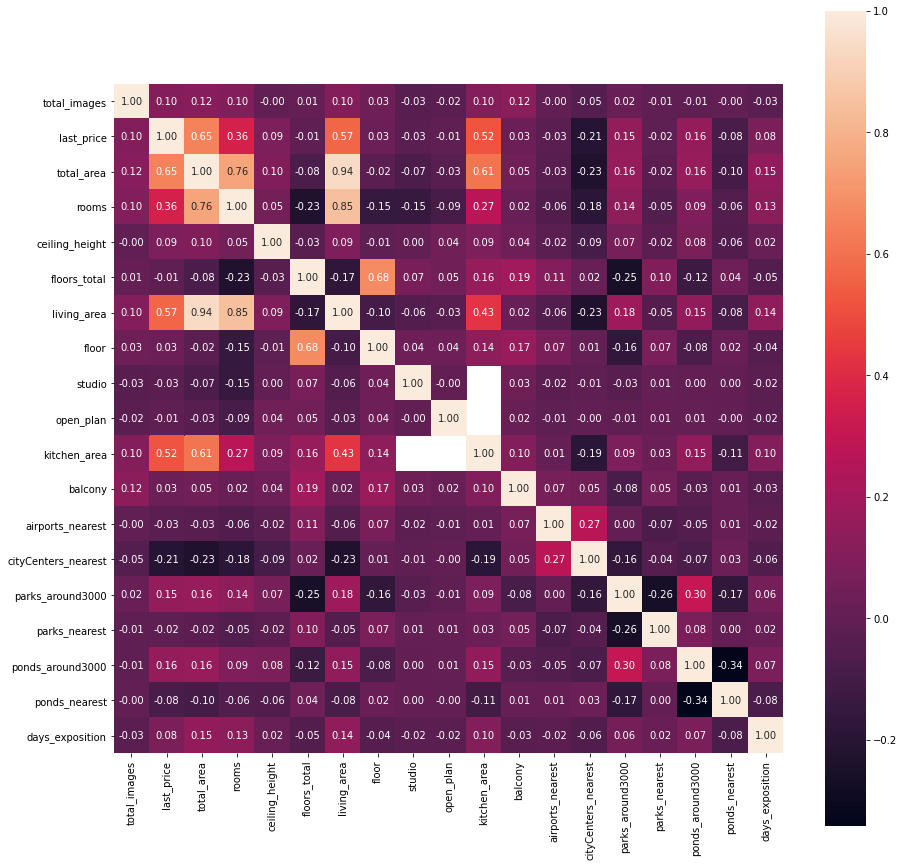

In [7]:
corr = data.corr()
plt.subplots(figsize=(15, 15))
sns.heatmap(corr, vmax=1, square=True, annot=True, fmt='.2f')
plt.show()

Матрица корреляций и тепловая карта, построенные на сырых данных, выглядит вполне ожидаемо, за некоторыми исключением (например, взаимосвязь этажности здания и наличие парков в радиусе 3000м или этажности здания и количества комнат).
Пропуски значений в тепловой карте связанны с тем, что столбцы `'studio'` и	`'open_plan'` - категориальные переменные.

#### Название столбца `'cityCenters_nearest'`

Приведем название столбца к общему виду

In [8]:
data = data.rename(columns ={'cityCenters_nearest' : 'city_center_nearest'})

### Предобработка данных

In [9]:
# количество пропусков
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
city_center_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [10]:
# доля пропусков
(data.isna().sum() / data.shape[0]).sort_values(ascending=False)

is_apartment            0.882906
parks_nearest           0.659100
ponds_nearest           0.615596
balcony                 0.486054
ceiling_height          0.387991
airports_nearest        0.233850
city_center_nearest     0.232879
ponds_around3000        0.232837
parks_around3000        0.232837
days_exposition         0.134225
kitchen_area            0.096122
living_area             0.080299
floors_total            0.003629
locality_name           0.002068
total_images            0.000000
last_price              0.000000
studio                  0.000000
floor                   0.000000
rooms                   0.000000
first_day_exposition    0.000000
total_area              0.000000
open_plan               0.000000
dtype: float64

#### Пропуски в столбце `'is_apartment'`

Рассмотрим столбец с самым большим числом пропусков `'is_apartment'`. Из ячейки c `.info()` видим, что тип данных - object, в то время как в столбце встречаются только три уникальных значения, два из которых True и False. Возможно, предполагалось, что тип данных в этом столбце будет bool.

Учитывая, что эти данные мы получаем от пользователя, можно предположить, что причина пропусков - не заполненная в нужном месте форма. Возможно, стоит пересмотреть проверку и обработку данных в отправляемых формах.

Явной связи в отсутствующих значениях в этом столбце и другими столбцами не наблюдается. 
Пропуски в данном случае лучше оставить как есть, т.к. нет возможности наверняка узнать, является ли помещение апартаментами или нет, а замена 88% значений на False сильно повлияет на результат

In [13]:
data['is_apartment'].unique()

array([nan, False, True], dtype=object)

In [14]:
data[(data['is_apartment'] == True)].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
543,11,12790000.0,56.60,2018-11-06T00:00:00,2,3.50,3.0,29.40,1,True,...,NaN,NaN,Петергоф,35248.0,30437.0,3.0,53.0,3.0,22.0,NaN
916,11,8183000.0,70.00,2018-01-11T00:00:00,2,3.12,3.0,40.00,3,True,...,NaN,2.0,Санкт-Петербург,45796.0,21729.0,0.0,NaN,1.0,754.0,179.0
1109,1,34878556.0,95.80,2014-12-09T00:00:00,2,NaN,6.0,58.30,5,True,...,20.00,1.0,Санкт-Петербург,21860.0,318.0,2.0,160.0,3.0,569.0,1572.0
1608,12,2150000.0,20.10,2019-01-30T00:00:00,1,NaN,9.0,NaN,1,True,...,NaN,NaN,Санкт-Петербург,26646.0,12147.0,0.0,NaN,0.0,NaN,13.0
2759,11,7500000.0,152.00,2018-07-27T00:00:00,3,3.00,3.0,NaN,1,True,...,NaN,1.0,Всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,7.0
2975,9,4931398.0,42.90,2018-07-23T00:00:00,1,3.15,4.0,20.39,3,True,...,10.29,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,1.0,792.0,273.0
3067,13,6600000.0,95.00,2018-09-08T00:00:00,2,4.50,7.0,45.00,7,True,...,25.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,96.0
3816,4,4779000.0,53.10,2016-05-16T00:00:00,1,NaN,13.0,19.80,6,True,...,15.90,2.0,Санкт-Петербург,19396.0,4516.0,0.0,NaN,1.0,826.0,60.0
3951,10,4300000.0,50.00,2019-04-20T00:00:00,1,3.00,11.0,17.00,9,True,...,12.00,2.0,Санкт-Петербург,10143.0,11367.0,0.0,NaN,0.0,NaN,NaN
4339,19,6900000.0,72.00,2019-03-25T00:00:00,3,3.50,4.0,70.00,1,True,...,NaN,NaN,Санкт-Петербург,31487.0,4466.0,2.0,353.0,1.0,439.0,22.0


In [15]:
data[(data['is_apartment'] == False)].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.00,4,False,...,6.00,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
25,3,6800000.0,76.0,2015-10-01T00:00:00,2,2.75,23.0,39.00,18,False,...,15.00,2.0,Санкт-Петербург,34967.0,14640.0,0.0,NaN,1.0,564.0,300.0
29,9,8600000.0,100.0,2016-04-09T00:00:00,3,NaN,19.0,52.00,15,False,...,11.00,0.0,Санкт-Петербург,30394.0,11526.0,1.0,532.0,1.0,896.0,125.0
36,13,3790000.0,45.0,2017-01-25T00:00:00,2,NaN,9.0,27.00,9,False,...,6.30,2.0,Санкт-Петербург,49574.0,16461.0,1.0,459.0,0.0,NaN,139.0
41,16,7900000.0,74.0,2016-05-04T00:00:00,3,NaN,14.0,59.00,8,False,...,12.00,5.0,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,179.0
42,13,22000000.0,161.8,2015-07-08T00:00:00,4,2.80,4.0,80.90,2,False,...,17.60,5.0,Петергоф,35416.0,30605.0,2.0,47.0,1.0,907.0,987.0
50,1,4500000.0,48.2,2017-11-13T00:00:00,1,2.70,5.0,25.40,4,False,...,9.00,1.0,Пушкин,19841.0,30183.0,1.0,531.0,3.0,330.0,152.0
56,14,4350000.0,41.0,2016-03-28T00:00:00,1,2.80,7.0,18.10,4,False,...,11.10,2.0,Санкт-Петербург,13772.0,9626.0,1.0,271.0,1.0,439.0,152.0
66,6,3450000.0,34.0,2015-12-16T00:00:00,1,2.60,17.0,17.40,8,False,...,11.50,2.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,186.0
69,6,4010000.0,50.7,2018-09-16T00:00:00,2,2.60,5.0,28.90,5,False,...,9.00,2.0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,194.0


#### Пропуски в столбцах `'airports_nearest'`,	`'city_сenters_nearest'`,	`'parks_around3000'`,	`'parks_nearest'`, `'ponds_around3000'`,	 `'ponds_nearest'`

Пропуски в этих столбцах скорее всего имеют общую природу, т.к. можно явно наблюдать строки, где все значения в этих столбцах - NaN.

In [16]:
data[(data['parks_nearest'].isna()) 
     & (data['ponds_nearest'].isna()) 
     & (data['airports_nearest'].isna()) 
     & (data['city_center_nearest'].isna())].head(30)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,NaN,5.0,30.00,5,NaN,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,NaN,9.0,NaN,2,NaN,...,NaN,NaN,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,NaN,...,NaN,NaN,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
38,10,3150000.0,40.00,2018-03-29T00:00:00,1,2.75,18.0,16.30,9,NaN,...,11.60,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,103.0
47,17,3600000.0,56.10,2018-10-18T00:00:00,3,NaN,4.0,42.50,3,NaN,...,5.70,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,179.0
60,3,2740000.0,35.00,2018-01-01T00:00:00,1,NaN,12.0,NaN,8,NaN,...,NaN,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,11.0
62,0,4800000.0,78.60,2017-09-17T00:00:00,3,2.80,9.0,48.80,5,NaN,...,11.90,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0


In [17]:
#общее количество пропусков
data[(data['parks_nearest'].isna()) 
     & (data['ponds_nearest'].isna()) 
     & (data['airports_nearest'].isna()) 
     & (data['city_center_nearest'].isna())].shape[0]

5518

Учитывая, что эти данные добавляются автоматически из картографических сервисов, можно предположить, что при их получении произошёл сбой (в определении местоположения, запросе данных у геосервиса, работы функций рассчитывающих значения и т.п.).

Всего подобных пропусков 5518 или 23% от всех записей.

Посмотрим, есть ли связь между пропусками и названием населенного пункта

In [18]:
#количество пропусков подобного рода, например, в Кудрово 
#(это городское поселение формально относится к ЛО, но находится внутри КАД)

data[(data['parks_nearest'].isna()) 
     & (data['ponds_nearest'].isna()) 
     & (data['airports_nearest'].isna()) 
     & (data['city_center_nearest'].isna()) 
     & (data['locality_name'] == 'Кудрово')].shape[0]

173

In [19]:
#общее число записей по 'Кудрово'

data[data['locality_name'] == 'Кудрово'].shape[0]

173

In [20]:
#количество пропусков подобного рода, например, в Стрельне (этот посёлок относится к Санкт-Петербургу)

data[(data['parks_nearest'].isna()) 
     & (data['ponds_nearest'].isna()) 
     & (data['airports_nearest'].isna()) 
     & (data['city_center_nearest'].isna()) 
     & (data['locality_name'] == 'посёлок Стрельна')].shape

(0, 22)

In [21]:
#общее число записей по 'посёлок Стрельна'

data[data['locality_name'] == 'посёлок Стрельна'].shape

(44, 22)

Можно наблюдать, что у в случае населённых пунктов относящихся к ЛО, пропуски подобного рода случаются чаще, вне зависимости от близости к аэропорту. Яркий пример - городское поселение Кудрово и посёлок Стрельна, которые находятся на приблизительно одинаковом удалении от Пулково, но при этом в записях о Стрельне - пропусков нет, а в записях о Кудрово - пропущены все значения в этих столбцах.

Однако, такие же пропуски случаются и у других населённых пунктов, в том числе и в записях о Санкт-Петербурге.

Так же, в группе этих столбцов, выделяется подгруппа из столбцов `'parks_nearest'`, `'ponds_nearest'`. 

In [22]:
data[data['parks_nearest'].isna()]['parks_around3000'].unique()

array([ 0., nan])

In [23]:
data[data['ponds_nearest'].isna()]['ponds_around3000'].unique()

array([ 0., nan])

In [24]:
data[(data['parks_nearest'].isna()) 
     & (data['ponds_nearest'].isna()) 
     & (~data['airports_nearest'].isna()) 
     & (~data['city_center_nearest'].isna())].head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,NaN,26.0,10.6,6,NaN,...,14.4,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.6,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
9,18,5400000.0,61.0,2017-02-26T00:00:00,3,2.5,9.0,43.6,7,NaN,...,6.5,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0


Помимо пропусков одновременно в шести столбцах, можно увидеть, что пропуск в столбце `'parks_nearest'` наблюдается в том случае, когда значение в `'parks_around3000'` равно нулю (или наоборот). Аналогично для `'ponds_nearest'`. 

Пропуски выглядит логично - расстояние до парка или водоема не указано, поэтому и количество парков/прудов рядом равно 0.

Можно предположить, что функция, которая обрабатывает значения столбцов `'parks_nearest'`, `'ponds_nearest'` для вычисления значений в столбцах `'parks_around3000'`, `'ponds_around3000'` не получила на вход никаких значений, отсюда и значение 0.

Восстановить или заполнить значения в `'parks_around3000'`, `'parks_nearest'`, `'ponds_around3000'`, `'ponds_nearest'` не представляется возможным, т.к. исходя из других данных невозможно сказать, есть ли в пределах 3000 метров парк или пруд и какое их количество.

В случае столбцов `'airports_nearest'`,	`'city_center_nearest'` для некоторых населённых пунктов можно применить заполнение медианным значением. 

In [25]:
data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['airports_nearest'].isna()), 'airports_nearest'] = \
data.loc[data['locality_name'] == 'Санкт-Петербург', 'airports_nearest'].median()

data.loc[(data['locality_name'] == 'Санкт-Петербург') & (data['city_center_nearest'].isna()), 'city_center_nearest'] = \
data.loc[data['locality_name'] == 'Санкт-Петербург', 'city_center_nearest'].median()

data.loc[(data['locality_name'] == 'Санкт-Петербург'), ['airports_nearest','city_center_nearest']].isna().sum()

airports_nearest       0
city_center_nearest    0
dtype: int64

#### Пропуски в столбце `'balcony'`

Явной связи с другими данными не наблюдается. Скорее всего пропуски в этом столбце появились по причине того, что пользователи просто не указали количество балконов, вероятно по причине их отсутствия.

Заменим отсутствующие значения на 0

In [26]:
data.loc[data['balcony'].isna(), 'balcony'] = 0
data['balcony'].isna().sum()

0

#### Пропуски в столбце `'ceiling_height'`

В этом столбце также не наблюдается явной связи с данными из других столбцов. Скорее всего, пользователи просто не вносили эти данные. 

Санкт-Петербург - город с очень разнообразной нетиповой застройкой, с различной высотой потолков, поэтому попробуем разбить наши данные, на две категории: условный центр города, со всей исторической застройкой (около 4000м - https://kontikimaps.ru/how-old/saint-p?p=h-spb), и весь остальной город, который строился позже. Посмотрим на медианные значения в Санкт-Петербурге по этому столбцу в зависимости от удаления от центра и заполним пропуски медианным значением в зависимости от удаленности

In [27]:
center_median = data.query('city_center_nearest <= 4000')['ceiling_height'].median()
center_median

3.16

In [28]:
outskirts_median = data.query('city_center_nearest > 4000')['ceiling_height'].median()
outskirts_median

2.65

In [29]:
data.loc[(data['locality_name'] == 'Санкт-Петербург'), 'ceiling_height'].isna().sum()

5617

In [30]:
data.loc[(data['city_center_nearest'] <= 4000) & 
             (data['ceiling_height'].isna()) & 
             (data['locality_name'] == 'Санкт-Петербург'), 'ceiling_height'] = center_median
 
data.loc[(data['city_center_nearest'] > 4000) & 
             (data['ceiling_height'].isna()) & 
             (data['locality_name'] == 'Санкт-Петербург'), 'ceiling_height']  = outskirts_median

data.loc[(data['locality_name'] == 'Санкт-Петербург'), 'ceiling_height'].isna().sum()

0

Оставшиеся NaN за пределами СПб заменим медианой, характерной не для СПб 

In [31]:
(
    data.loc[(data['locality_name'] != 'Санкт-Петербург'), 'ceiling_height'] 
) = data.loc[(data['locality_name'] != 'Санкт-Петербург'), 'ceiling_height'].median()

data['ceiling_height'].isna().sum()

0

#### Пропуски в столбцах `'kitchen_area'` и `'living_area'`

И опять, явной связи пропусков в этих столбцах с данными в других не наблюдается. Скорее всего, пользователи опять не ввели никаких значений.

Попробуем заполнить пропуски средним значением(жилая зона) и модой(кухни) отталкиваясь от общей площади с интервалом в 5 квадратных метров.

Перед этим рассмотрим, сколько имеется аномальных значений, исходя из формулы `total_area*0.9 <= (living_area + kitchen_area)`, предполагая, что остальная площадь квартиры составляет 10%.

In [32]:
# кол-во условно аномальных значений до замены
data.query('total_area*0.9 <= (living_area + kitchen_area)').shape[0]

475

In [33]:
data.living_area.isna().sum()

1903

In [34]:
data.kitchen_area.isna().sum()

2278

In [35]:
ta_max = int(data.loc[data['living_area'].isna(), 'total_area'].max()) - 5
ta_max

626

In [36]:
for i in range(0, ta_max, 2): 
    try:
        data.loc[(data['living_area'].isna()) & (data['total_area'] > i) & (data['total_area'] <= (i+2)), 'living_area'] = \
        data.loc[(data['total_area'] > i) & (data['total_area'] <= (i+5)), 'living_area'].mean().round(1)
    except:
        continue

In [37]:
ka_max = int(data.loc[data['kitchen_area'].isna(), 'total_area'].max()) - 5
ka_max

495

In [38]:
for i in range(30, ka_max, 2):
    try:
        data.loc[(data['kitchen_area'].isna()) & (data['total_area'] > i) & (data['total_area'] <= (i+2)), 'kitchen_area'] = \
        data.loc[(data['total_area'] > i) & (data['total_area'] <= (i+5)), 'kitchen_area'].mode()[0]
    except:
        continue

In [39]:
data.living_area.isna().sum()

6

In [40]:
data.kitchen_area.isna().sum()

399

In [41]:
# кол-во условно аномальных значений после замены
data.query('total_area*0.9 <= (living_area + kitchen_area)').shape[0]

573

Как видим, после замены число пропусков значительно уменьшилось(до 1%), при этом аномальных значений прибавилось всего на 0,3% от общего числа записей.

Часть пропусков в столбце `'kitchen_area'` осталось и заполнить их модой или средним можно, но это приведет к значительно большему числу аномалий. Что логично, ведь квартиры до 30 м могут быть студиями и не иметь кухни как таковой вообще, либо она может быть очень небольшого размера. 

Посмотрим, есть ли пропуски в студиях, и каких обычно размеров бывают кухни в студиях

In [42]:
data.loc[(data['studio']) & (data['kitchen_area'].isna())].shape[0]

123

In [43]:
# видим что большая часть студий не превышает 30 кв. м
data.loc[(data['studio']), 'total_area'].describe()

count    149.000000
mean      27.783154
std        9.310360
min       15.500000
25%       24.000000
50%       26.000000
75%       29.000000
max       98.400000
Name: total_area, dtype: float64

In [44]:
data.loc[(data['studio']), 'kitchen_area'].describe()

count    26.000000
mean      7.384615
std       1.601922
min       6.000000
25%       6.000000
50%       6.000000
75%       9.000000
max      10.000000
Name: kitchen_area, dtype: float64

In [45]:
data.loc[(data['total_area'] >= 29) & (data['kitchen_area'] > 0) & (data['studio'])].shape[0]

26

Упоминание о наличии кухни есть только у 26 студий, причём все они более 29 метров в общей площади. Наблюдений слишком мало, чтобы сделать вывод по всем студиям и пропускам в целом, а заполнение значением 6 увеличит почти в двое аномальные значения. 

Вероятно студии и квартиры менее 29 кв.м стоит рассматривать отдельно. Остаток пропущенных значений оставим как есть. 

#### Остальные пропуски

Посмотрим на картину после заполнения всего, что было возможно.

In [46]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
ponds_around3000         5518
parks_around3000         5518
city_center_nearest      5458
airports_nearest         5457
days_exposition          3181
kitchen_area              399
floors_total               86
locality_name              49
living_area                 6
balcony                     0
total_images                0
last_price                  0
studio                      0
floor                       0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Остальные пропуски в сумме занимают менее 1%, можно их исключить

In [47]:
data = data.dropna(subset=['floors_total', 'locality_name'])
data.isna().sum().sort_values(ascending=False)

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
ponds_around3000         5500
parks_around3000         5500
city_center_nearest      5441
airports_nearest         5440
days_exposition          3171
kitchen_area              388
living_area                 6
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
floor                       0
floors_total                0
ceiling_height              0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

#### Типы данных

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23559 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          23177 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Необходимо изменить тип данных:

- `'first_day_exposition'` на datetime64, т.к. в столбце указано время размещения и для использования функций для работы с датой необходим этот тип данных
- `'balcony'` на int64, т.к. количество балконов не может быть дробным
- `'days_exposition'`на int64, т.к. нас интересует целое количество дней публикации объявления
- `'floors_total'`на int64, т.к. количество этажей не может быть дробным
  
Также можно было бы изменить:

- `'is_apartment'` на bool, т.к данные в этом столбце подразумевают ответ да/нет (True/False)
- `'parks_around3000'` на int64, т.к. количество парков не может быть дробным 
- `'ponds_around3000'` на int64, т.к. количество водоемов не может быть дробным 

Однако, в столбце `'is_apartment'` есть пустые строки, которые в случае изменения типа превратятся в False в 88% записей, что может сильно повлиять общую картину. В остальных трех колонках есть NaN, поэтому тип данных в любом случае останется `float64` 

In [49]:
# Переводим в datetime64, откидывая часы, минуты и секунды, т.к. они всегда равны нулю и не несут никакой информации.
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')
data['first_day_exposition'].head()

0   2019-03-07
1   2018-12-04
2   2015-08-20
3   2015-07-24
4   2018-06-19
Name: first_day_exposition, dtype: datetime64[ns]

In [50]:
data['balcony'] = data['balcony'].astype('int64', errors='ignore')
data['balcony'].head()

0    0
1    2
2    0
3    0
4    0
Name: balcony, dtype: int64

In [51]:
data['days_exposition'] = data['days_exposition'].astype('int64', errors='ignore')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           23559 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          2760 non-null   object        
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23177 non-null  float64       
 13  balcony         

In [52]:
data['floors_total'] = data['floors_total'].astype('int64', errors='ignore')
data['floors_total'].head()

0    16
1    11
2     5
3    14
4    14
Name: floors_total, dtype: int64

#### Устранение неявных дубликатов

Рассмотрим на предмет неявных дубликатов столбец `'locality_name'`

In [53]:
data.duplicated().sum()

0

In [54]:
data.locality_name.duplicated().sum()

23201

In [55]:
data.locality_name.nunique()

364

In [56]:
sorted(data.locality_name.unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'городской поселок Большая Ижора',
 'городской поселок Янино-1',
 'городской посёлок Будогощь',
 'городской посёлок Виллози',
 'городской посёлок Лесогорский',
 'городской посёлок Мга',
 'городской посёлок Назия',
 'городской посёлок Новоселье',
 'городской посёлок Павлово',
 'городской посёлок Рощино',
 'городской посёлок Свирьстрой',
 'городской посёлок Советский',
 'городской посёлок Фёдоровское',
 'городск

In [57]:
data.locality_name = data.locality_name.str.replace('посёлок', 'поселок')
data.locality_name = data.locality_name.str.replace('городской поселок', 'поселок городского типа')
data.locality_name = data.locality_name.str.replace('поселок станции', 'поселок при железнодорожной станции')
data.locality_name.nunique()

321

In [58]:
sorted(data.locality_name.unique())

['Бокситогорск',
 'Волосово',
 'Волхов',
 'Всеволожск',
 'Выборг',
 'Высоцк',
 'Гатчина',
 'Зеленогорск',
 'Ивангород',
 'Каменногорск',
 'Кингисепп',
 'Кириши',
 'Кировск',
 'Колпино',
 'Коммунар',
 'Красное Село',
 'Кронштадт',
 'Кудрово',
 'Лодейное Поле',
 'Ломоносов',
 'Луга',
 'Любань',
 'Мурино',
 'Никольское',
 'Новая Ладога',
 'Отрадное',
 'Павловск',
 'Петергоф',
 'Пикалёво',
 'Подпорожье',
 'Приморск',
 'Приозерск',
 'Пушкин',
 'Санкт-Петербург',
 'Светогорск',
 'Сертолово',
 'Сестрорецк',
 'Сланцы',
 'Сосновый Бор',
 'Сясьстрой',
 'Тихвин',
 'Тосно',
 'Шлиссельбург',
 'деревня Агалатово',
 'деревня Аро',
 'деревня Батово',
 'деревня Бегуницы',
 'деревня Белогорка',
 'деревня Большая Вруда',
 'деревня Большая Пустомержа',
 'деревня Большие Колпаны',
 'деревня Большое Рейзино',
 'деревня Большой Сабск',
 'деревня Бор',
 'деревня Борисова Грива',
 'деревня Ваганово',
 'деревня Вартемяги',
 'деревня Вахнова Кара',
 'деревня Выскатка',
 'деревня Гарболово',
 'деревня Глинка',
 '

In [59]:
def type_only(locality_name):
    m = re.match(r'[а-я ]+ ', locality_name)
    
    if m is None:
        return 'город'
    elif 'имени' in m.group(0):
        return m.group(0).replace(' имени ','')
    else: 
        return m.group(0).strip()

In [60]:
data['locality_type'] = data.locality_name.apply(type_only)
sorted(data.locality_type.unique())

['город',
 'деревня',
 'коттеджный поселок',
 'поселок',
 'поселок городского типа',
 'поселок при железнодорожной станции',
 'садоводческое некоммерческое товарищество',
 'садовое товарищество',
 'село']

Возможно, для избегания дублирования можно предлагать пользователю список уже имеющихся типов населенных пунктов.

Также проведем проверку на наличие одинаковых объявлений

In [64]:
data[data.duplicated(['total_area', 'floor', 'floors_total', 'city_center_nearest', 'locality_name', 'rooms'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type
1376,6,2500000.0,42.0,2019-03-06,2,2.60,5,29.00,3,NaN,...,1,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город
2395,9,1750000.0,44.0,2016-06-09,1,2.60,5,18.00,1,NaN,...,0,Кириши,NaN,NaN,NaN,NaN,NaN,NaN,22.0,город
3568,17,4950000.0,58.0,2018-02-20,3,2.65,9,39.20,4,NaN,...,0,Санкт-Петербург,31691.0,12580.0,0.0,NaN,0.0,NaN,264.0,город
3576,9,5250000.0,57.1,2015-04-06,3,2.53,9,39.00,8,False,...,1,Санкт-Петербург,19816.0,11347.0,0.0,NaN,0.0,NaN,508.0,город
4606,12,2900000.0,74.0,2017-12-14,3,2.60,5,44.60,4,NaN,...,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,40.0,город
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23516,3,22529250.0,139.5,2018-07-04,4,3.30,16,82.55,9,NaN,...,0,Санкт-Петербург,37434.0,8460.0,1.0,441.0,2.0,427.0,266.0,город
23541,16,5200000.0,63.0,2017-10-27,3,2.55,12,41.00,4,NaN,...,0,Санкт-Петербург,49631.0,14525.0,2.0,672.0,1.0,172.0,165.0,город
23548,14,2250000.0,36.0,2017-10-14,1,2.60,5,17.00,5,NaN,...,0,Выборг,NaN,NaN,NaN,NaN,NaN,NaN,425.0,город
23643,1,660000.0,45.0,2019-02-19,2,2.60,5,31.00,4,False,...,1,Сланцы,NaN,NaN,NaN,NaN,NaN,NaN,NaN,город


In [65]:
data.drop_duplicates(subset=['total_area', 'floor', 'floors_total', 'city_center_nearest', 'locality_name', 'rooms'], 
                     keep='first', inplace=True)
data[data.duplicated(['total_area', 'floor', 'floors_total', 'city_center_nearest', 'locality_name', 'rooms'])]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_type


### Добавляем новые столбцы

#### Цена одного квадратного метра

In [68]:
data['square_meter_cost'] = round(data['last_price'] / data['total_area'], 2)
data['square_meter_cost'].head()

0    120370.37
1     82920.79
2     92785.71
3    408176.10
4    100000.00
Name: square_meter_cost, dtype: float64

#### День недели публикации объявления 

In [69]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['weekday'].head()

0    3
1    1
2    3
3    4
4    1
Name: weekday, dtype: int64

#### Месяц публикации объявления

In [70]:
data['month'] = data['first_day_exposition'].dt.month
data['month'].head()

0     3
1    12
2     8
3     7
4     6
Name: month, dtype: int64

#### Год публикации объявления

In [71]:
data['year'] = data['first_day_exposition'].dt.year
data['year'].head()

0    2019
1    2018
2    2015
3    2015
4    2018
Name: year, dtype: int64

#### Тип этажа квартиры

In [72]:
def floor_typing(floor, max_floor):
    if floor == 1:
        return 'первый'
    elif floor == max_floor and floor != 1:
        return 'последний'
    else:
        return 'другой'

In [73]:
data['floor_type'] = data.apply(lambda x: floor_typing(x.floor, x.floors_total), axis=1)
data.floor_type.unique()

array(['другой', 'первый', 'последний'], dtype=object)

#### Расстояние до центра города в километрах

In [74]:
data['city_center_nearest_km'] = round(data['city_center_nearest'] / 1000)
data['city_center_nearest_km'].head()

0    16.0
1    19.0
2    14.0
3     7.0
4     8.0
Name: city_center_nearest_km, dtype: float64

### Исследовательский анализ данных

Список параметров:
общая площадь;
жилая площадь;
площадь кухни;
цена объекта;
количество комнат;
высота потолков;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;
расстояние до центра города в метрах;
расстояние до ближайшего парка

#### Параметр `'total_area'`

In [75]:
data.total_area.describe()

count    23357.000000
mean        60.373047
std         35.694484
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

In [76]:
def hist_plot(df, col_name, title, x_name):
    df[col_name].hist(bins=100, range=(0, 400), figsize=(17,5)).set_title(f'{title} \n', fontsize = 18)
    plt.xlabel(f'{x_name}', fontsize=14)
    plt.ylabel('Количество значений \n', fontsize=14);

In [77]:
def box_plot(df, col_name, title, x_name):
    df.boxplot(vert=False, column=col_name, figsize=(17,5)).set_title(f'Размах {title} \n', fontsize = 18)
    plt.ylabel(f'{x_name} \n', fontsize=14)
    plt.xlabel('\n Величина значений', fontsize=14);

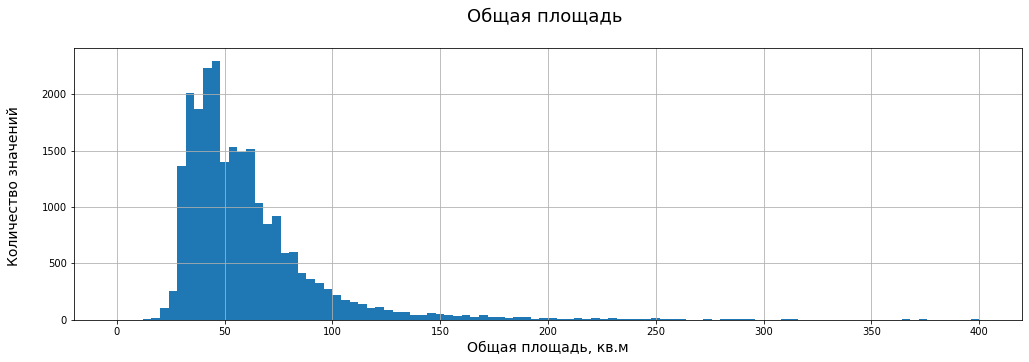

In [78]:
hist_plot(data, 'total_area', 'Общая площадь', 'Общая площадь, кв.м')

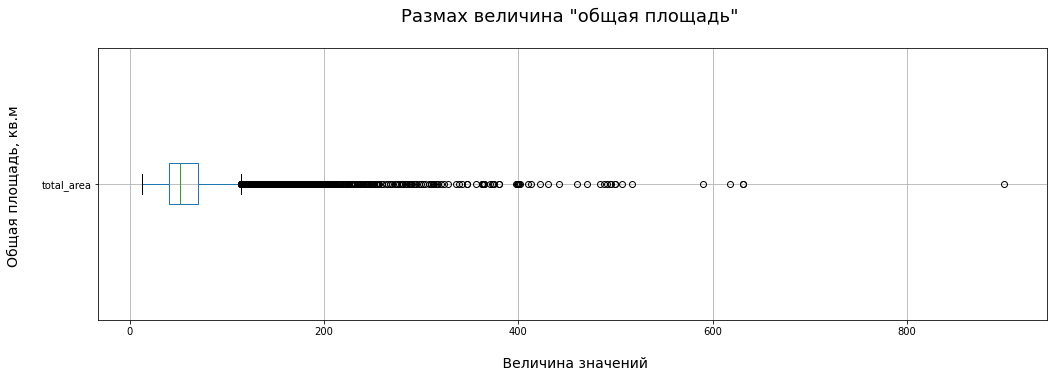

In [79]:
box_plot(data, 'total_area', 'величина "общая площадь"', 'Общая площадь, кв.м')

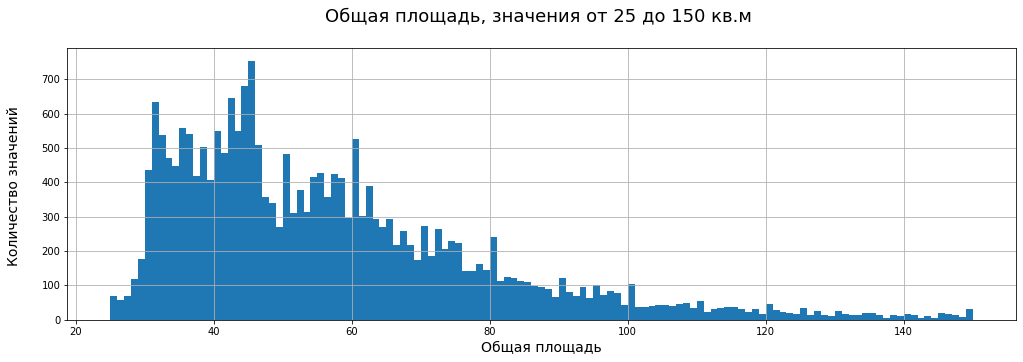

In [80]:
data.total_area.hist(bins=125, 
                     range=(25,150), 
                     figsize=(17,5)).set_title('Общая площадь, значения от 25 до 150 кв.м \n', fontsize = 18)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

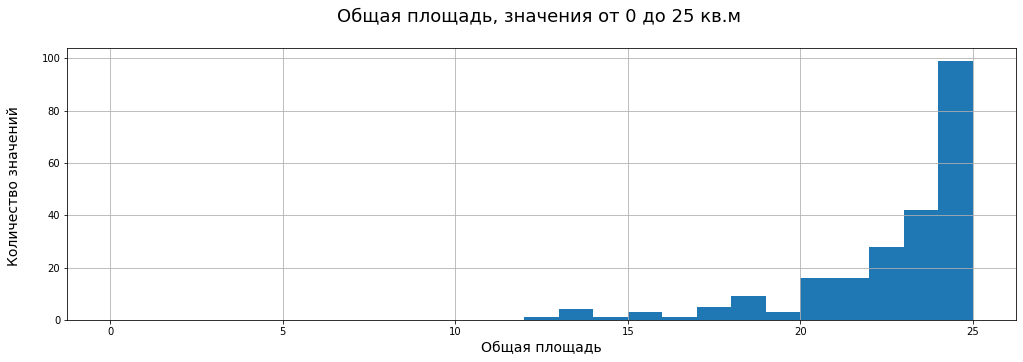

In [81]:
data.total_area.hist(bins=25, 
                     range=(0,25), 
                     figsize=(17,5)).set_title('Общая площадь, значения от 0 до 25 кв.м \n', fontsize = 18)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

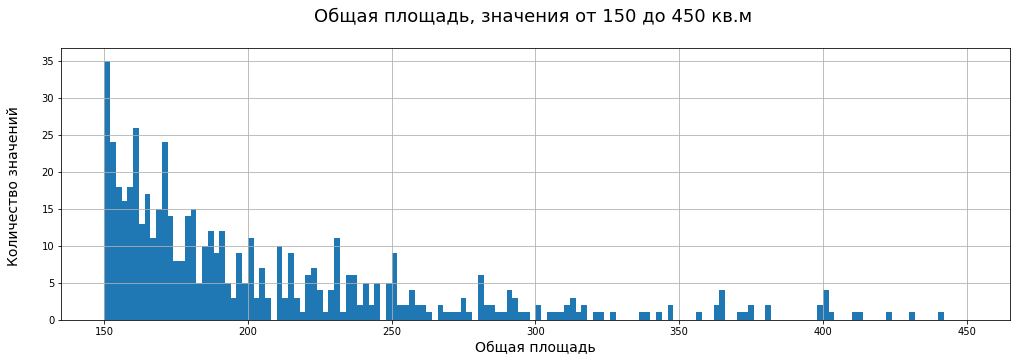

In [82]:
data.total_area.hist(bins=150, 
                     range=(150,450), 
                     figsize=(17,5)).set_title('Общая площадь, значения от 150 до 450 кв.м \n', fontsize = 18)
plt.xlabel('Общая площадь', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

C, что большая часть значений расположилась в отрезке от 12 до 69, есть большой "хвост" из выдающихся из общего числа значений, который начинается от 250 кв.м. Так же редкими можно назвать квартиры менее 20 кв.м
Если посмотреть на строки с данными - ошибок в записях с большой площадью не наблюдается.

Логично было бы рассматривать выдающиеся значения отдельно от основной массы.

In [83]:
df = data[(data['total_area'] <= 250) & (data['total_area'] >= 20)]
df.total_area.describe()

count    23220.000000
mean        59.061905
std         28.894536
min         20.000000
25%         40.000000
50%         52.000000
75%         69.100000
max        250.000000
Name: total_area, dtype: float64

#### Жилая площадь

In [84]:
df.living_area.describe()

count    23220.000000
mean        33.944856
std         18.964531
min          2.000000
25%         18.800000
50%         30.000000
75%         42.100000
max        220.000000
Name: living_area, dtype: float64

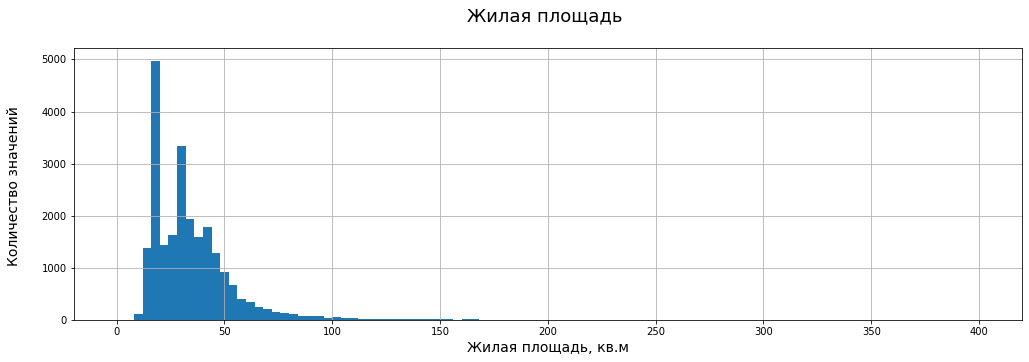

In [85]:
hist_plot(df, 'living_area', 'Жилая площадь', 'Жилая площадь, кв.м')

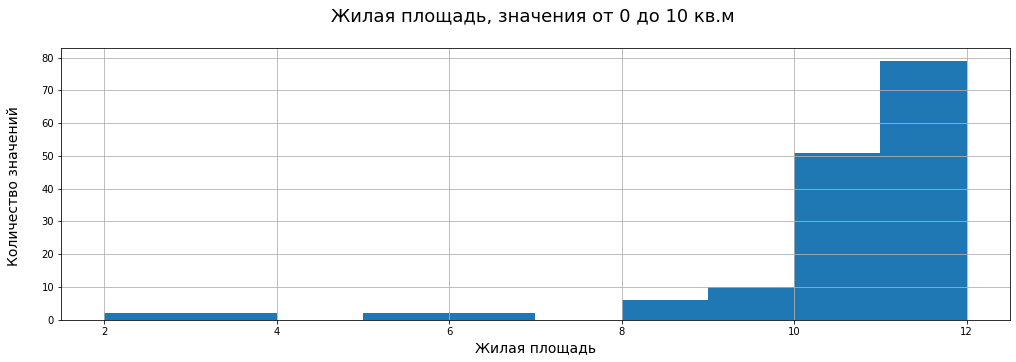

In [86]:
df.living_area.hist(bins=10, 
                     range=(2,12), 
                     figsize=(17,5)).set_title('Жилая площадь, значения от 0 до 10 кв.м \n', fontsize = 18)
plt.xlabel('Жилая площадь', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

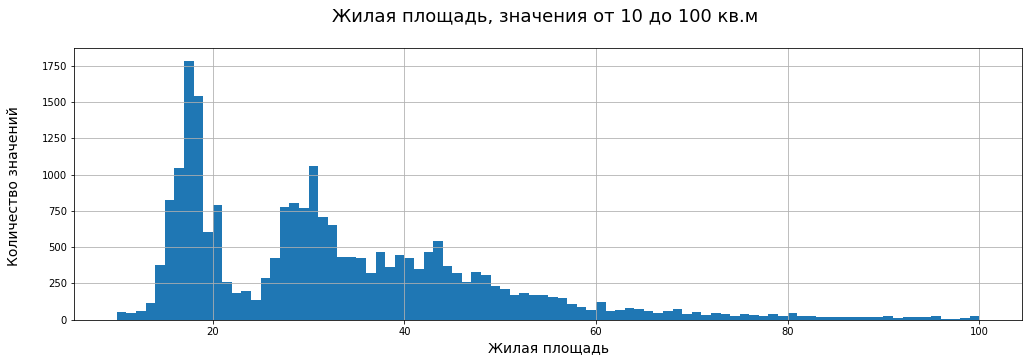

In [87]:
df.living_area.hist(bins=90, 
                     range=(10,100), 
                     figsize=(17,5)).set_title('Жилая площадь, значения от 10 до 100 кв.м \n', fontsize = 18)
plt.xlabel('Жилая площадь', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

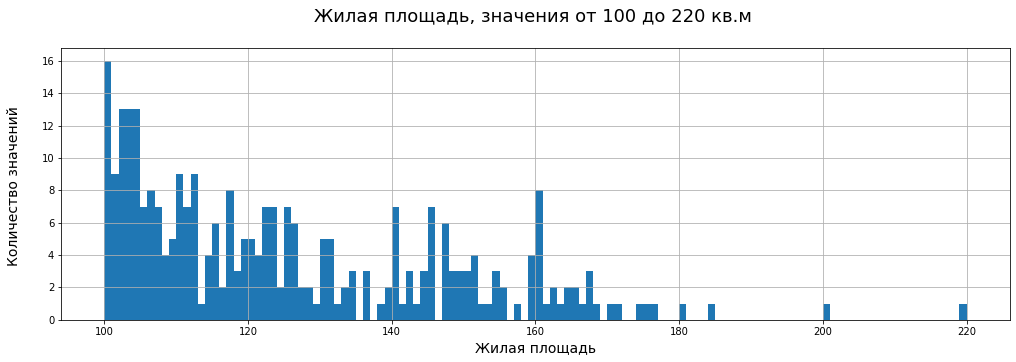

In [88]:
df.living_area.hist(bins=120, 
                     range=(100,220), 
                     figsize=(17,5)).set_title('Жилая площадь, значения от 100 до 220 кв.м \n', fontsize = 18)
plt.xlabel('Жилая площадь', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

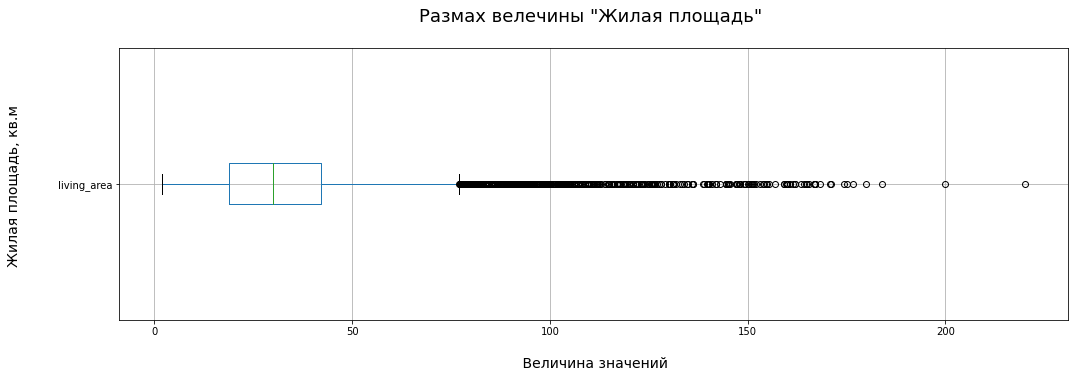

In [89]:
box_plot(df, 'living_area', 'велечины "Жилая площадь"', 'Жилая площадь, кв.м \n')

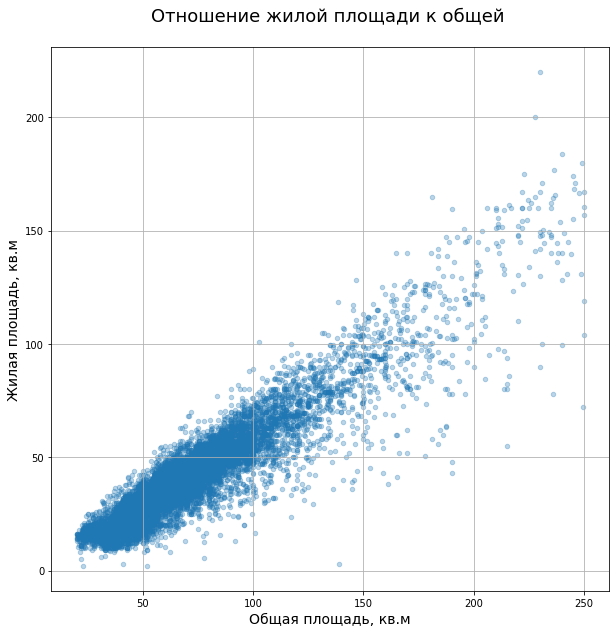

In [90]:
(
    df.plot(x='total_area', y='living_area', kind='scatter', alpha=0.3, figsize=(10,10), grid=True)
        .set_title('Отношение жилой площади к общей \n', fontsize = 18)
)
plt.xlabel('Общая площадь, кв.м', fontsize=14)
plt.ylabel('Жилая площадь, кв.м', fontsize=14);

На гистограммах видим, что значения менее 10 кв.м и более 120 кв.м уже двольное редкое явление

In [91]:
df = df.query('living_area >= 10 & living_area <= 120')

In [92]:
df.living_area.describe()

count    23051.000000
mean        33.282842
std         16.837329
min         10.000000
25%         18.700000
50%         30.000000
75%         42.000000
max        120.000000
Name: living_area, dtype: float64

#### Площадь кухни

In [93]:
df.kitchen_area.describe()

count    22693.000000
mean        10.279532
std          5.317431
min          1.300000
25%          7.000000
50%          9.000000
75%         11.600000
max        107.000000
Name: kitchen_area, dtype: float64

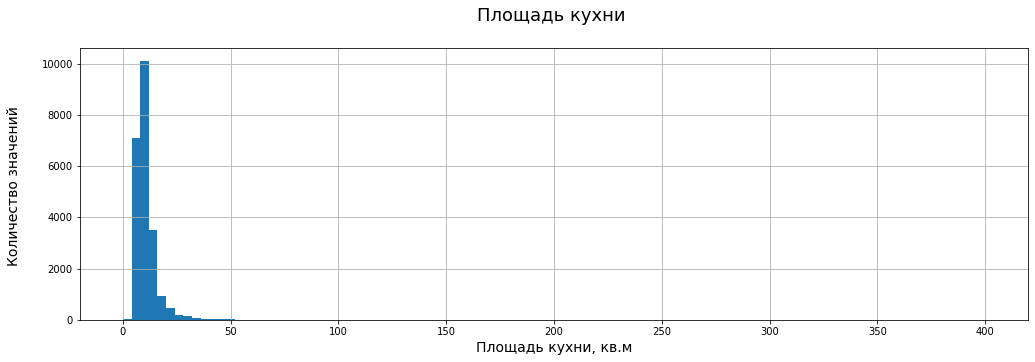

In [94]:
hist_plot(df, 'kitchen_area', 'Площадь кухни','Площадь кухни, кв.м')

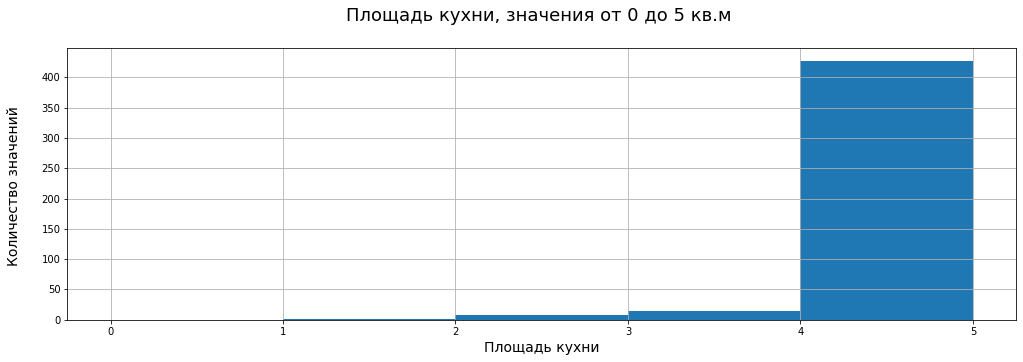

In [95]:
df.kitchen_area.hist(bins=5, 
                     range=(0,5), 
                     figsize=(17,5)).set_title('Площадь кухни, значения от 0 до 5 кв.м \n', fontsize = 18)
plt.xlabel('Площадь кухни', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

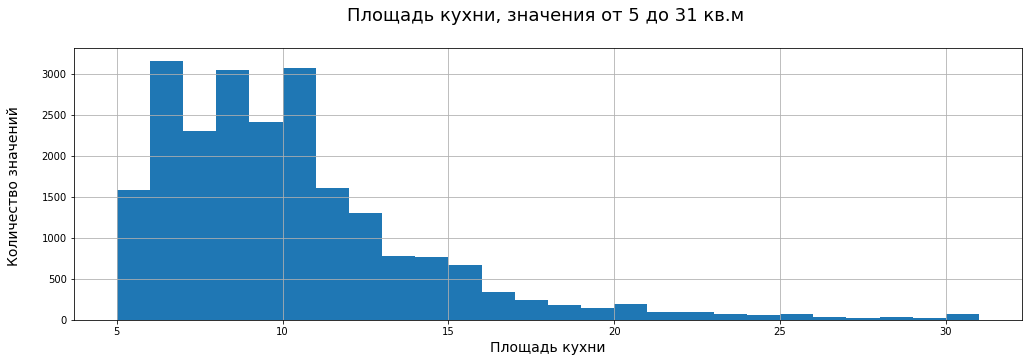

In [96]:
df.kitchen_area.hist(bins=26, 
                     range=(5,31), 
                     figsize=(17,5)).set_title('Площадь кухни, значения от 5 до 31 кв.м \n', fontsize = 18)
plt.xlabel('Площадь кухни', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

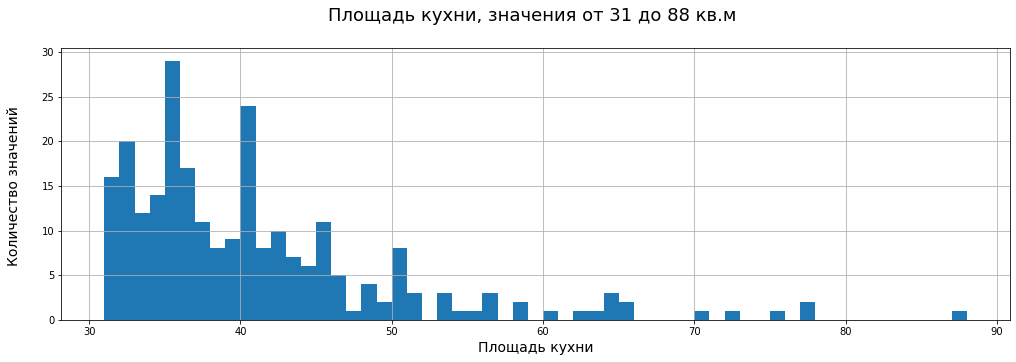

In [97]:
df.kitchen_area.hist(bins=57, 
                     range=(31,88), 
                     figsize=(17,5)).set_title('Площадь кухни, значения от 31 до 88 кв.м \n', fontsize = 18)
plt.xlabel('Площадь кухни', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

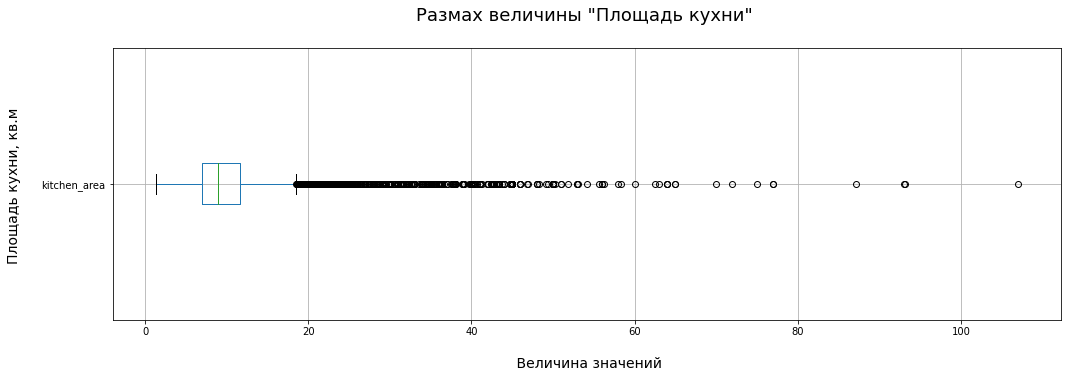

In [98]:
box_plot(df, 'kitchen_area', 'величины "Площадь кухни"','Площадь кухни, кв.м')

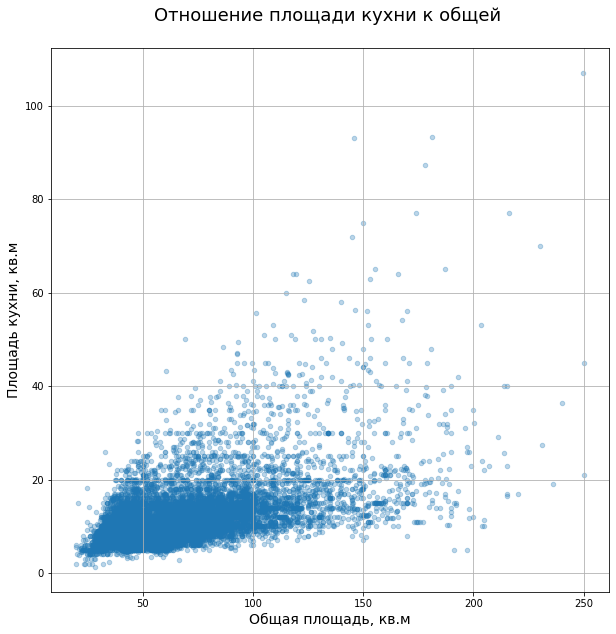

In [99]:
(
    df.plot(x='total_area', y='kitchen_area', kind='scatter', alpha=0.3, figsize=(10,10), grid=True)
        .set_title('Отношение площади кухни к общей \n', fontsize = 18)
)
plt.xlabel('Общая площадь, кв.м', fontsize=14)
plt.ylabel('Площадь кухни, кв.м', fontsize=14);

Из описательных характеристик и графиков видно, что большая часть значений расположилась в интервале от 4 кв.м до 20 кв.м. 
Можно видеть зависимость между площадью кухни и общей площадью, однако она отличается от зависимости жилой площади к общей.
Размер кухни растёт пропорционально в жилье в меньшей общей площадью, а затем уже перестаёт строго от неё зависеть.
Кухни более 46 кв.м можно считать редкостью

In [100]:
df = df.query('kitchen_area >= 4 & kitchen_area <= 46')
df.kitchen_area.describe()

count    22623.000000
mean        10.186678
std          4.787659
min          4.000000
25%          7.000000
50%          9.000000
75%         11.600000
max         46.000000
Name: kitchen_area, dtype: float64

#### Цена объекта

In [101]:
df.last_price.describe()

count    2.262300e+04
mean     6.015310e+06
std      5.964481e+06
min      1.219000e+04
25%      3.498500e+06
50%      4.650000e+06
75%      6.700000e+06
max      3.300000e+08
Name: last_price, dtype: float64

In [102]:
#Для удобства рассмотрим и переведем столбец в млн. руб
last_price = (df.last_price / 1_000_000).round(4)
last_price.describe()

count    22623.000000
mean         6.015310
std          5.964481
min          0.012200
25%          3.498500
50%          4.650000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

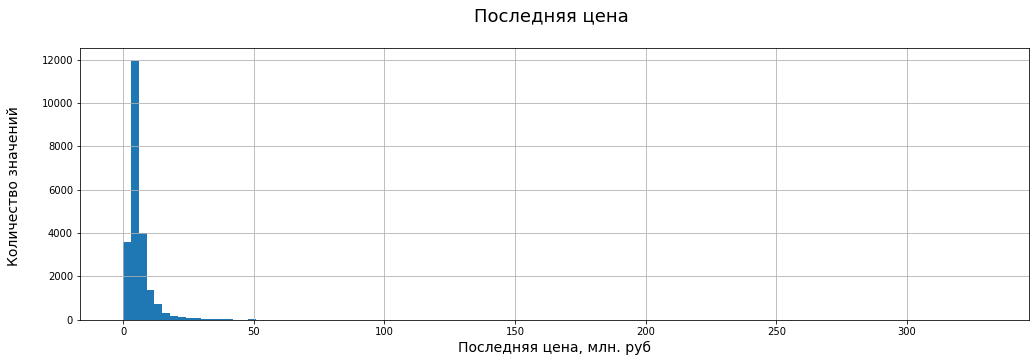

In [103]:
last_price.hist(bins=110,
                range=(0,330),
                figsize=(17,5)).set_title('Последняя цена \n', fontsize = 18)
plt.xlabel('Последняя цена, млн. руб', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

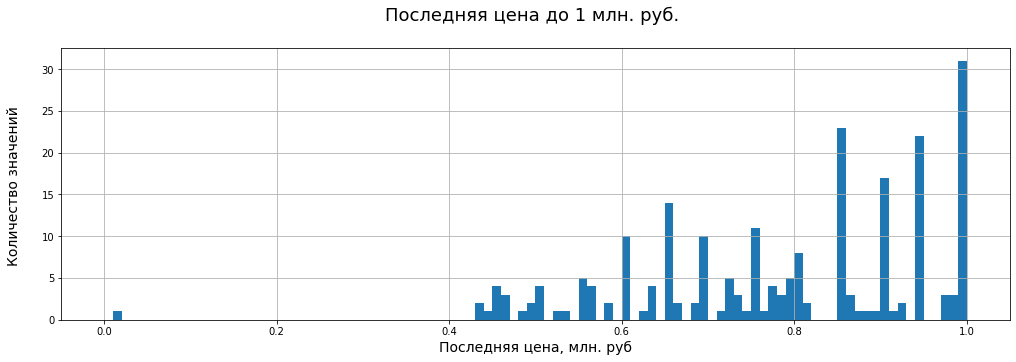

In [104]:
last_price.hist(bins=100,
                range=(0,1),
                figsize=(17,5)).set_title('Последняя цена до 1 млн. руб. \n', fontsize = 18)
plt.xlabel('Последняя цена, млн. руб', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

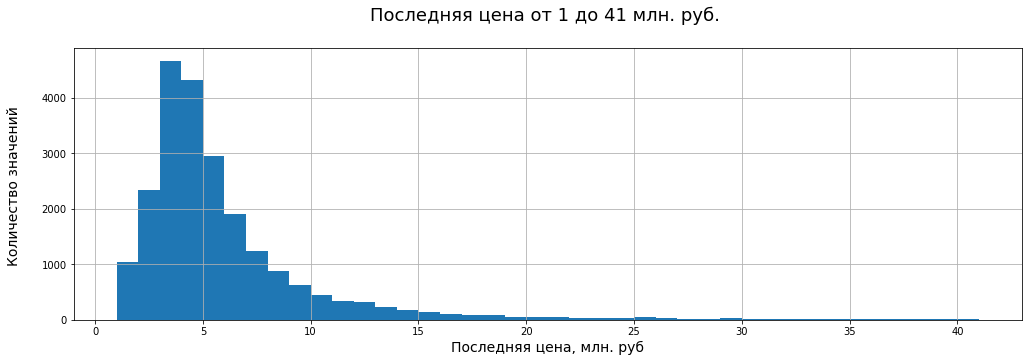

In [105]:
last_price.hist(bins=40,
                range=(1,41),
                figsize=(17,5)).set_title('Последняя цена от 1 до 41 млн. руб. \n', fontsize = 18)
plt.xlabel('Последняя цена, млн. руб', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

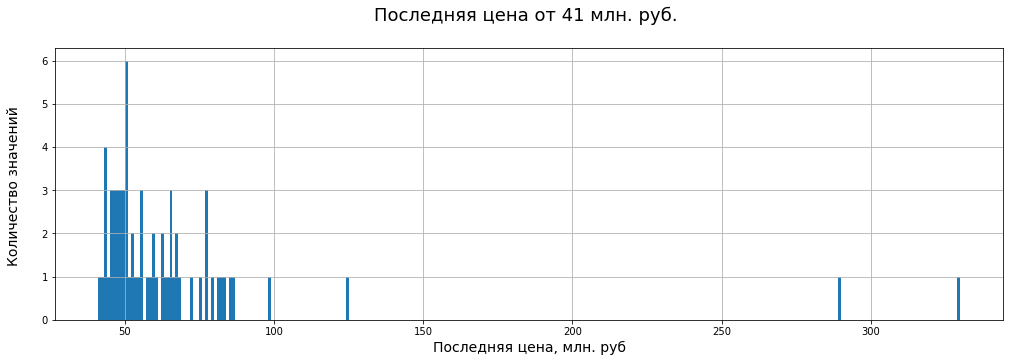

In [106]:
last_price.hist(bins=289,
                range=(41,330),
                figsize=(17,5)).set_title('Последняя цена от 41 млн. руб. \n', fontsize = 18)
plt.xlabel('Последняя цена, млн. руб', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

Из описательных характеристик и графиков, можем видеть, что стоимость квартиры более 41 млн рублей - уже довольно редкое явление.
Также редкими можно назвать объекты со стоимостью ниже 600 тыс. руб.

In [107]:
df = df.query('last_price < 41_000_000 & last_price > 600_000')
df.last_price.describe()

count    2.251500e+04
mean     5.844350e+06
std      4.304044e+06
min      6.200000e+05
25%      3.500000e+06
50%      4.650000e+06
75%      6.700000e+06
max      4.066200e+07
Name: last_price, dtype: float64

#### Количество комнат

In [108]:
df.rooms.describe()

count    22515.000000
mean         2.051033
std          0.968418
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

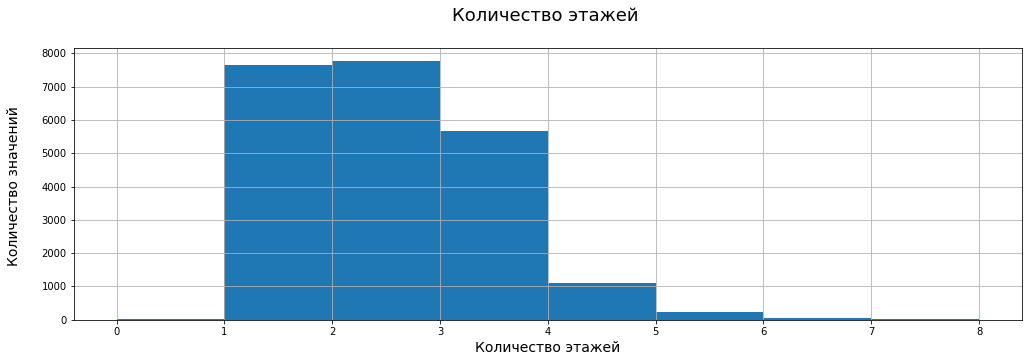

In [109]:
df.rooms.hist(bins=8, 
              range=(0,8), 
              figsize=(17,5)).set_title('Количество этажей \n', fontsize = 18)
plt.xlabel('Количество этажей', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

In [110]:
df.rooms.value_counts()

2    7773
1    7645
3    5660
4    1103
5     239
6      49
0      31
7      13
8       2
Name: rooms, dtype: int64

Из гистограммы и подсчета количества значений видим аномалию - 0 комнат. Также редкими являются квартиры с количеством комнат более 7

In [111]:
df = df.query('rooms != 0 & rooms < 7')
df.rooms.describe()

count    22469.000000
mean         2.050470
std          0.957406
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

#### Высота потолков

In [112]:
df.ceiling_height.describe()

count    22469.000000
mean         2.700509
std          0.871626
min          1.000000
25%          2.600000
50%          2.600000
75%          2.650000
max        100.000000
Name: ceiling_height, dtype: float64

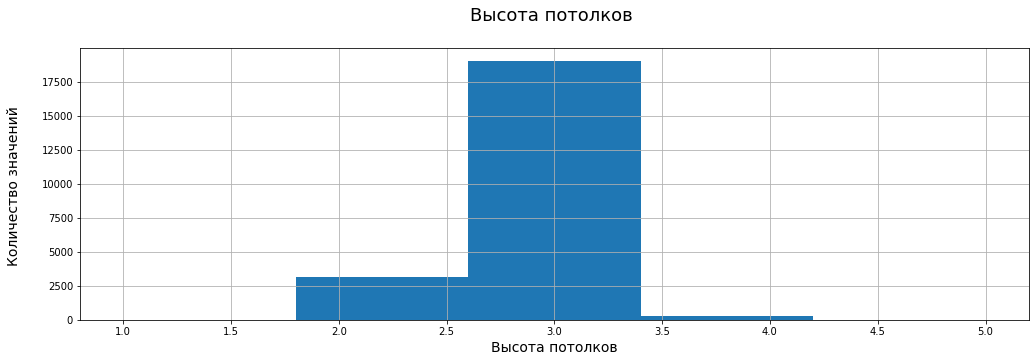

In [113]:
df.ceiling_height.hist(bins=5, 
                       range=(1,5), 
                       figsize=(17,5)).set_title('Высота потолков \n', fontsize = 18)
plt.xlabel('Высота потолков', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

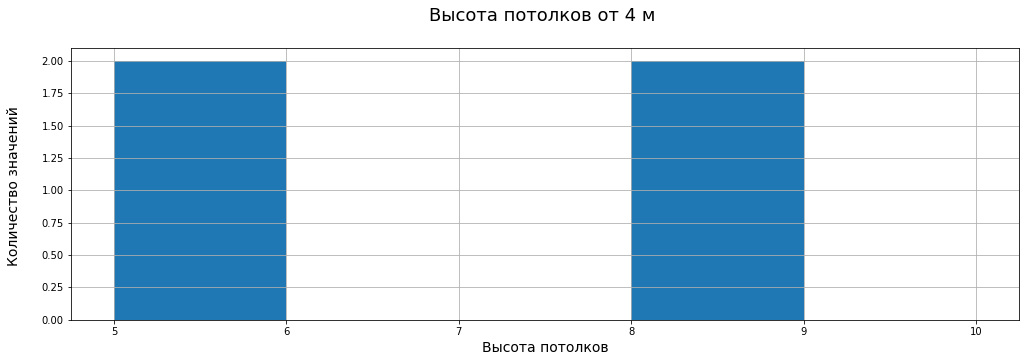

In [114]:
df.ceiling_height.hist(bins=5, 
                       range=(5,10), 
                       figsize=(17,5)).set_title('Высота потолков от 4 м \n', fontsize = 18)
plt.xlabel('Высота потолков', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

In [115]:
df.ceiling_height.value_counts()

2.60     8466
2.65     5479
2.50     2081
2.70      993
3.00      851
         ... 
14.00       1
3.58        1
8.00        1
4.40        1
22.60       1
Name: ceiling_height, Length: 162, dtype: int64

Здесь видим несколько аномальных значений: все, что менее 2.5 м (высота потолка жилого помещения не может быть менее 2.5 м по строительным нормам) и те, что выше 4 м

In [116]:
df = df.query('ceiling_height >= 2.5 & ceiling_height <= 4')
df.ceiling_height.describe()

count    22392.000000
mean         2.681025
std          0.193126
min          2.500000
25%          2.600000
50%          2.600000
75%          2.650000
max          4.000000
Name: ceiling_height, dtype: float64

#### Тип этажа квартиры («первый», «последний», «другой»)

In [117]:
df.floor_type.describe()

count      22392
unique         3
top       другой
freq       16500
Name: floor_type, dtype: object

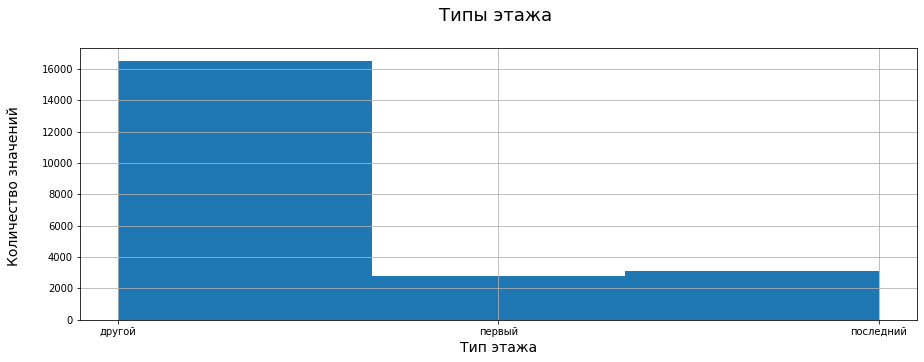

In [118]:
df.floor_type.hist(bins=3,
                   figsize=(15,5)).set_title('Типы этажа \n', fontsize = 18)
plt.xlabel('Тип этажа', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

Ожидаемо, квартир типа "другой" большинство

#### Общее количество этажей в доме

In [119]:
df.floors_total.describe()

count    22392.000000
mean        10.690336
std          6.559610
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

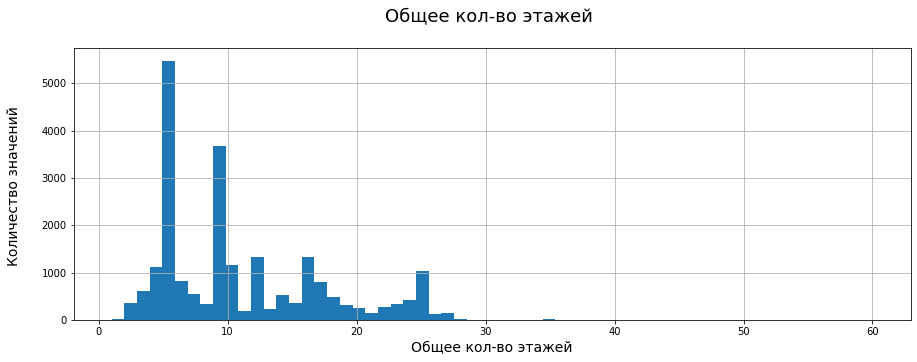

In [120]:
df.floors_total.hist(bins=60,
                     range=(1,60),
                     figsize=(15,5)).set_title('Общее кол-во этажей \n', fontsize = 18)
plt.xlabel('Общее кол-во этажей', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

Здесь видна явная ошибка заполнения - 60-этажных зданий в СПб и области совершенно точно нет. Вероятно "60" - это 6
Так же странным выглядит количество этажей равных 52. Тут просто заменим максимальное количество этажей на количество указанное в столбце `'floor'`

In [121]:
df.loc[data['floors_total'] == 60, 'floors_total'] = 6
df.loc[data['floors_total'] == 52, 'floors_total'] = 18
df.floors_total.describe()

count    22392.000000
mean        10.686406
std          6.545765
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

#### Расстояние до центра города в метрах

In [122]:
df.city_center_nearest.describe()

count    17325.000000
mean     14397.497489
std       8605.621255
min        181.000000
25%       9629.000000
50%      13195.000000
75%      16361.000000
max      65968.000000
Name: city_center_nearest, dtype: float64

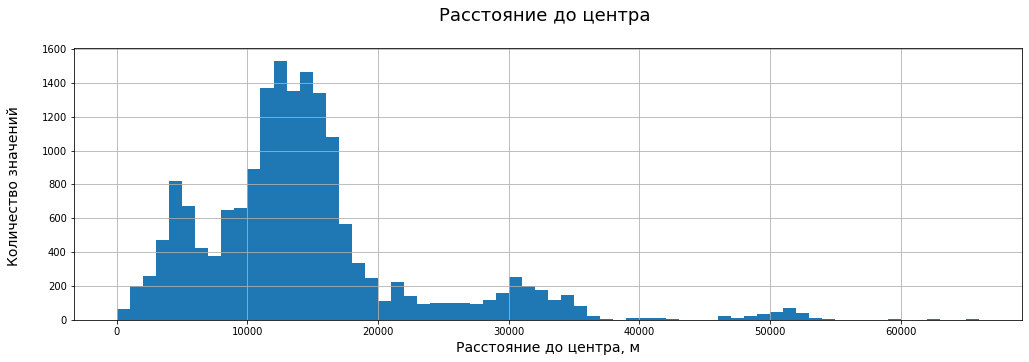

In [123]:
df.city_center_nearest.hist(bins=66,
                     range=(0,66000),
                     figsize=(17,5)).set_title('Расстояние до центра \n', fontsize = 18)
plt.xlabel('Расстояние до центра, м', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

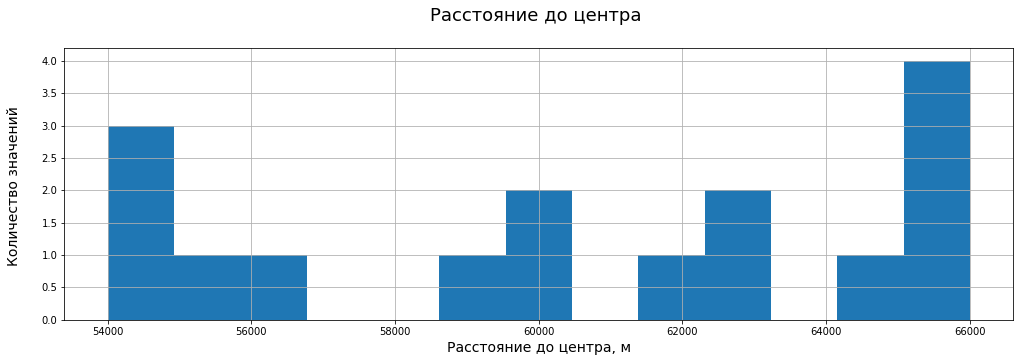

In [124]:
df.city_center_nearest.hist(bins=13,
                     range=(54000,66000),
                     figsize=(17,5)).set_title('Расстояние до центра \n', fontsize = 18)
plt.xlabel('Расстояние до центра, м', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

In [125]:
df.city_center_nearest.quantile(0.059)

4047.232

На гистограмме видно несколько пиков, что вероятно связано с расположением жилья по районам и входящим в СПб населённым пунктам. После 54000м уже идут единичные значения.

Из описательных характеристик можно заметить, что в условном историческом центре (до 4км) расположено только около 6% всех квартир.

In [126]:
df = df.loc[(df['city_center_nearest'] < 54000) | (df['city_center_nearest'].isna())] 
df.shape

(22376, 29)

#### Расстояние до ближайшего парка

In [127]:
df.parks_nearest.describe()

count    7609.000000
mean      492.895124
std       343.388175
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

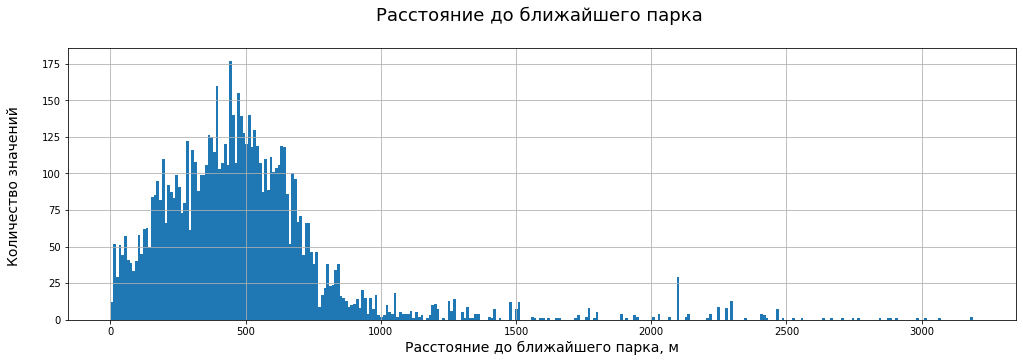

In [128]:
df.parks_nearest.hist(bins=320,
                     figsize=(17,5)).set_title('Расстояние до ближайшего парка \n', fontsize = 18)
plt.xlabel('Расстояние до ближайшего парка, м', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

Тут видим немногочисленные значения более 3000м. По условиям, если парк менее чем в 3000м, то это означает, что поблизости парка нет. 

####  Количество дней размещения объявления `'days_exposition'` и как быстро продавались квартиы.

In [129]:
df.days_exposition.describe()

count    19387.000000
mean       179.853768
std        218.518347
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

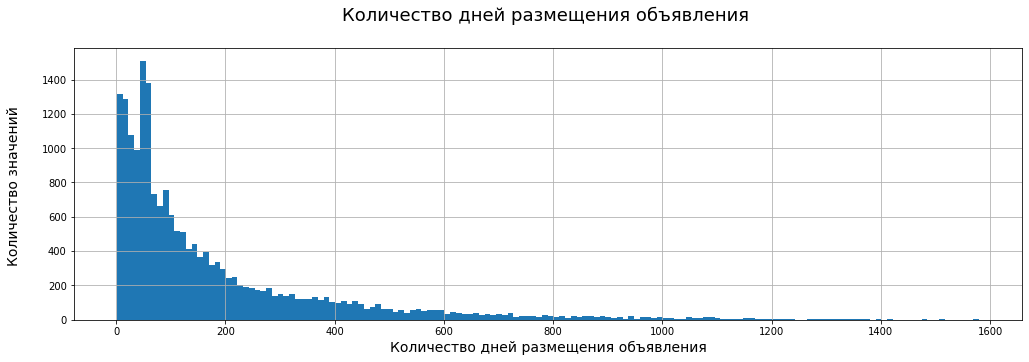

In [130]:
df.days_exposition.hist(bins=150,
                     figsize=(17,5)).set_title('Количество дней размещения объявления \n', fontsize = 18)
plt.xlabel('Количество дней размещения объявления', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

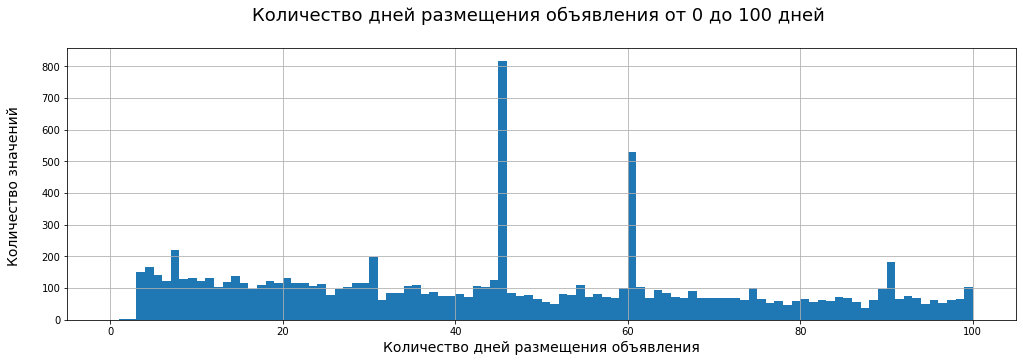

In [131]:
df.days_exposition.hist(bins=100,
                        range=(0,100),
                     figsize=(17,5)).set_title('Количество дней размещения объявления от 0 до 100 дней \n', fontsize = 18)
plt.xlabel('Количество дней размещения объявления', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

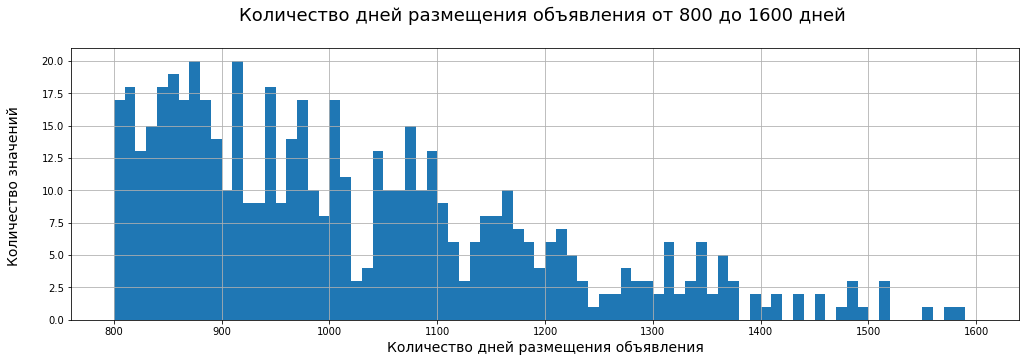

In [132]:
df.days_exposition.hist(bins=80,
                        range=(800,1600),
                     figsize=(17,5)).set_title('Количество дней размещения объявления от 800 до 1600 дней \n', fontsize = 18)
plt.xlabel('Количество дней размещения объявления', fontsize=14)
plt.ylabel('Количество значений \n', fontsize=14);

In [133]:
df.query('days_exposition < 100').days_exposition.value_counts().head(10)

45.0    817
60.0    529
7.0     221
30.0    198
90.0    183
4.0     165
3.0     152
5.0     141
14.0    139
9.0     133
Name: days_exposition, dtype: int64

In [134]:
df = df.loc[(df['days_exposition'] < 1200) | (df['days_exposition'].isna())]
df.shape

(22291, 29)

In [135]:
df.days_exposition.describe()

count    19302.000000
mean       174.791369
std        205.116926
min          1.000000
25%         45.000000
50%         95.000000
75%        226.000000
max       1199.000000
Name: days_exposition, dtype: float64

In [136]:
df.groupby('rooms').median()['days_exposition']

rooms
1     81.0
2     91.0
3    113.0
4    148.0
5    151.5
6    204.0
Name: days_exposition, dtype: float64

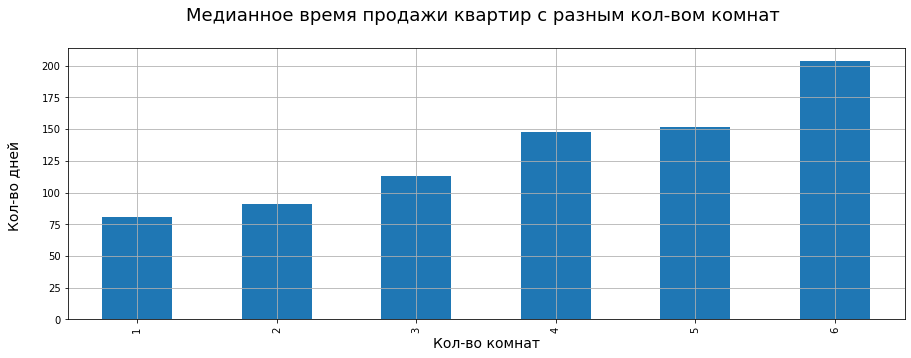

In [137]:
(df.groupby('rooms').median()['days_exposition']
 .plot(kind='bar', figsize=(15,5), grid=True)
 .set_title('Медианное время продажи квартир с разным кол-вом комнат \n', fontsize = 18)
)
plt.xlabel('Кол-во комнат', fontsize=14)
plt.ylabel('Кол-во дней \n', fontsize=14);

In [138]:
df.groupby('year').median()['days_exposition']

year
2014    752.0
2015    558.0
2016    235.0
2017    103.0
2018     64.0
2019     24.0
Name: days_exposition, dtype: float64

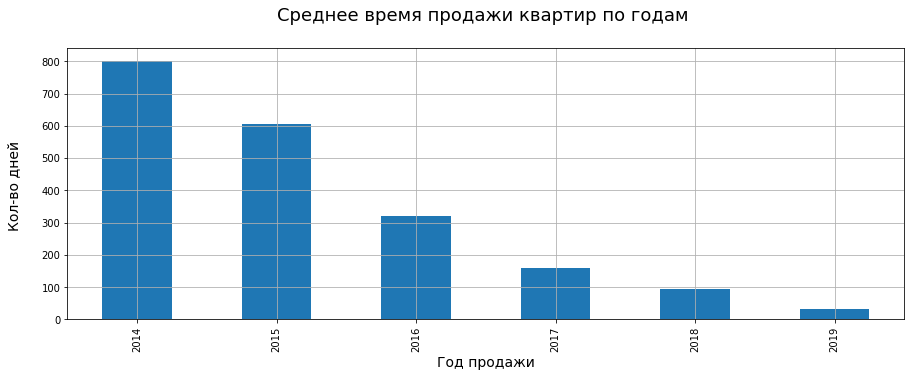

In [139]:
(df.groupby('year').mean()['days_exposition']
 .plot(kind='bar', figsize=(15,5), grid=True)
 .set_title('Среднее время продажи квартир по годам \n', fontsize = 18)
)
plt.xlabel('Год продажи', fontsize=14)
plt.ylabel('Кол-во дней \n', fontsize=14);

In [140]:
fill = df.loc[df['days_exposition'].isna()].fillna('Missing').groupby('year').count()['days_exposition']

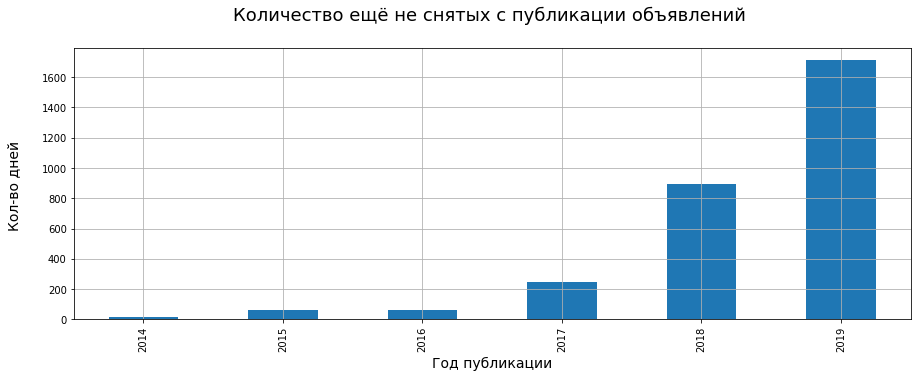

In [141]:
(
 fill.plot(kind='bar', figsize=(15,5), grid=True)
 .set_title('Количество ещё не снятых с публикации объявлений \n', fontsize = 18)
)
plt.xlabel('Год публикации', fontsize=14)
plt.ylabel('Кол-во дней \n', fontsize=14);

На графиках видны пиковые значения в 45, 60, 7, 30 и 90 дней - вероятно это как-то связано с правилами и сроками размещения объявлений, которые некоторое время действовали на сайте:

>Продажа квартир: <br>
>до 4,5 млн — 45 дней <br>
>от 4,5 до 10 млн — 60 дней <br>
>от 10 млн — 90 дней <br>

>Комната: <br>
>45 дней<br>

>Дом/участок/гараж:<br>
>90 дней<br>

Cейчас для СПб и ЛО другие правила размещения: 
>Продажа квартир и комнат — 365 дней <br>
>Продажа и аренда коммерческой недвижимости и гаражей — 90 дней <br>
>Платное объявление — 30 дней.

Количество дней публикации свыше 1200 дней можно уже назвать редкими.

Среднее количество дней, которое объявление было опубликовано - 174 <br>
Медиана - 95 дней

- Быстрой можно назвать продажу до 45 дней.
- Долгой - свыше 229.  
- В среднем, продажа квартиры занимает от 45 до 229 дней. 
- Квартиры с меньшим количеством комнат продаются быстрее
- С течением времени, количество неснятых объявлений увеличивается 
- С течением времени, среднее время продажи уменьшается (что впрочем не говорит об увеличении скорости продажи, а только о меньшем количестве неснятых объявлений)

Стоит также учесть - мы рассматриваем параметр описывающий количество дней, которое объявление находилось в публикации. То есть, снятие объявления с публикации не обязательно означает продажу квартиры.
Возможно, часть объявлений снята по каким-то другим причинам.

#### Факторы, которые больше всего влияют на общую (полную) стоимость объекта

In [153]:
df_part = df[['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'weekday','month','year']]

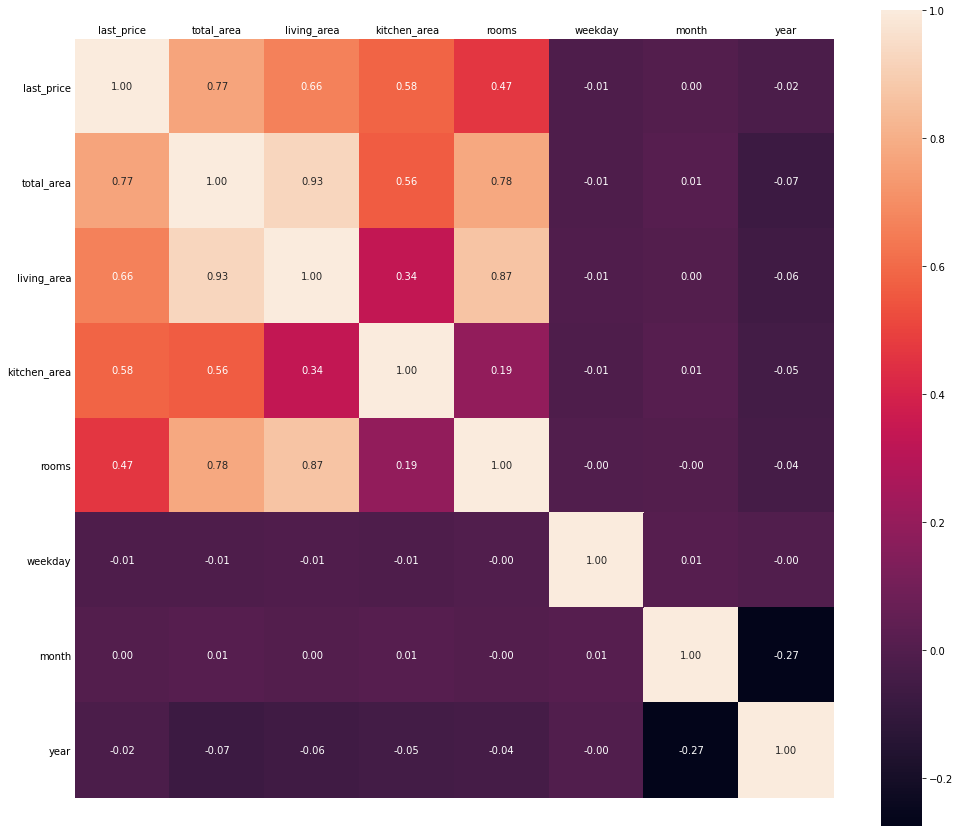

In [154]:
corr = df_part.corr()
plt.subplots(figsize=(17, 15))
ax = sns.heatmap(corr, vmax=1, square=True, annot=True, fmt='.2f')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.tick_params(length=0)
plt.yticks(rotation=0)
plt.show()

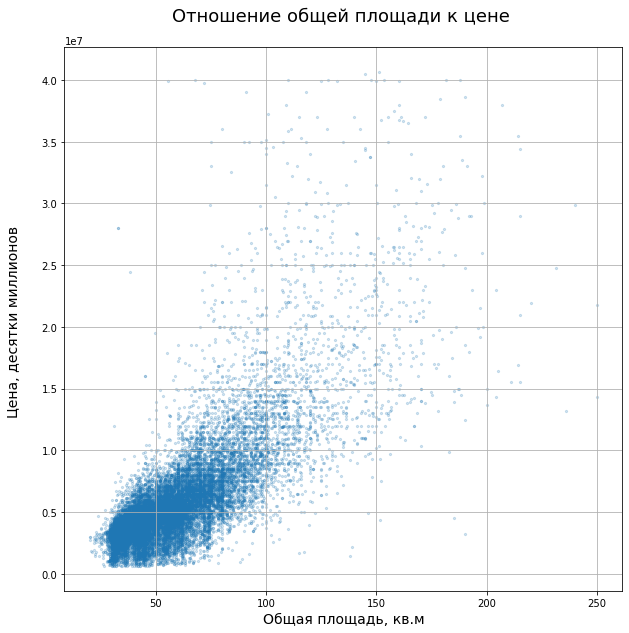

In [155]:
(
    df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.2, figsize=(10,10), grid=True, s=5)
        .set_title('Отношение общей площади к цене \n', fontsize = 18)
)
plt.xlabel('Общая площадь, кв.м', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

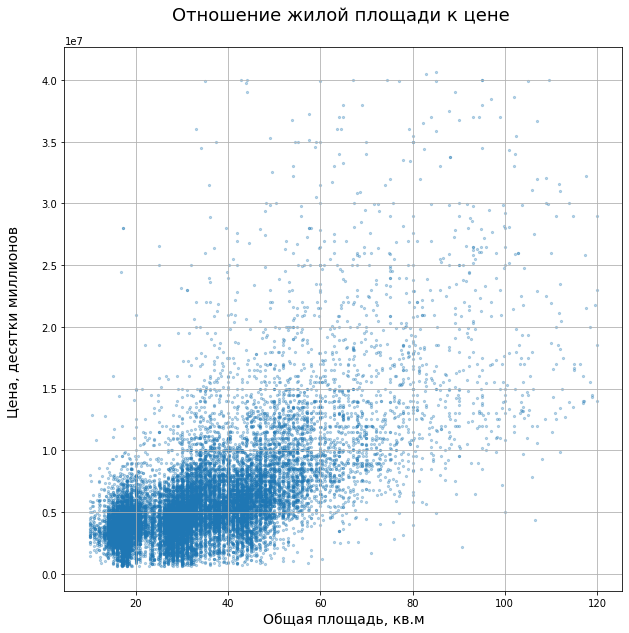

In [156]:
(
    df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10,10), grid=True, s=5)
        .set_title('Отношение жилой площади к цене \n', fontsize = 18)
)
plt.xlabel('Общая площадь, кв.м', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

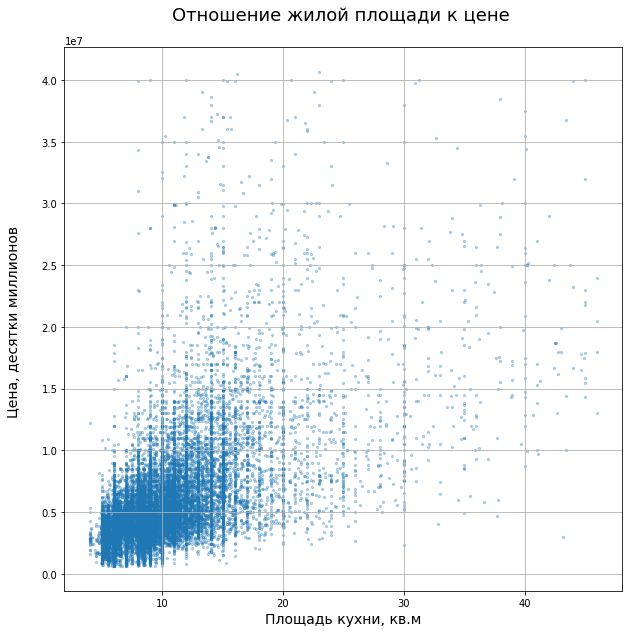

In [157]:
(
    df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3, figsize=(10,10), grid=True, s=5)
        .set_title('Отношение жилой площади к цене \n', fontsize = 18)
)
plt.xlabel('Площадь кухни, кв.м', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

In [158]:
def p_table(col_name):
    table = df.pivot_table(index=col_name, values='last_price', aggfunc=['count', 'mean', 'median'])
    table.columns = ['count', 'price_mean', 'price_median']
    return table


p_table('rooms')

,count,price_mean,price_median
rooms,,,
1,7606,3.871919e+06,3620500.0
2,7709,5.491076e+06,4790000.0
3,5604,7.560659e+06,6150000.0
4,1089,1.068496e+07,8700000.0
5,236,1.330635e+07,12000000.0
6,47,1.546118e+07,13300000.0


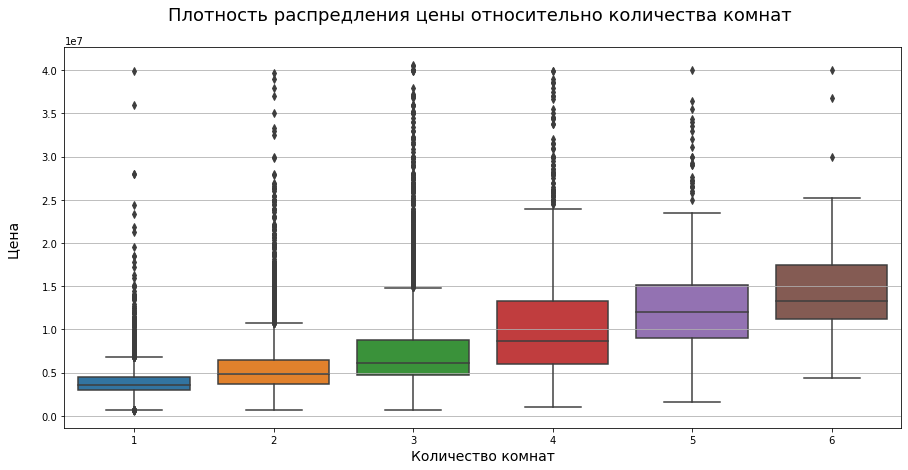

In [159]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='rooms').set_title('Плотность распредления цены относительно количества комнат \n', 
                                                          fontsize = 18)
plt.xlabel('Количество комнат', fontsize=14)
plt.ylabel('Цена \n', fontsize=14);

In [160]:
p_table('floor_type')

,count,price_mean,price_median
floor_type,,,
другой,16432,6.086187e+06,4850000.0
первый,2752,4.553717e+06,3950000.0
последний,3107,5.507981e+06,4285000.0


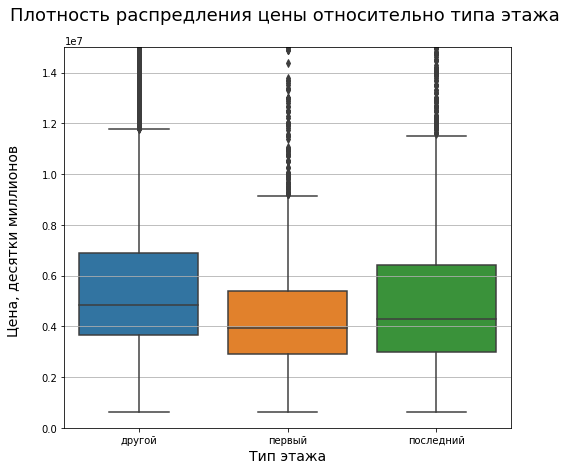

In [161]:
plt.subplots(figsize=(8, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='floor_type').set_title('Плотность распредления цены относительно типа этажа \n', 
                                                               fontsize = 18)
plt.ylim([0, 15_000_000])
plt.xlabel('Тип этажа', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

In [162]:
p_table('year')

,count,price_mean,price_median
year,,,
2014,106,9.728140e+06,7182500.0
2015,1033,6.554203e+06,5144000.0
2016,2604,5.836082e+06,4550000.0
2017,7729,5.721680e+06,4500000.0
2018,8087,5.637133e+06,4600000.0
2019,2732,6.165505e+06,5100000.0


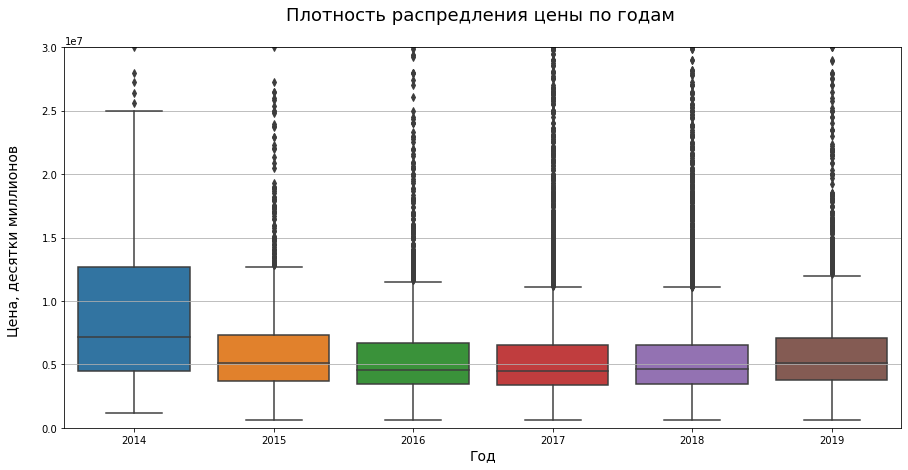

In [163]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='year').set_title('Плотность распредления цены по годам \n', fontsize = 18)
plt.ylim([0, 30_000_000])
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

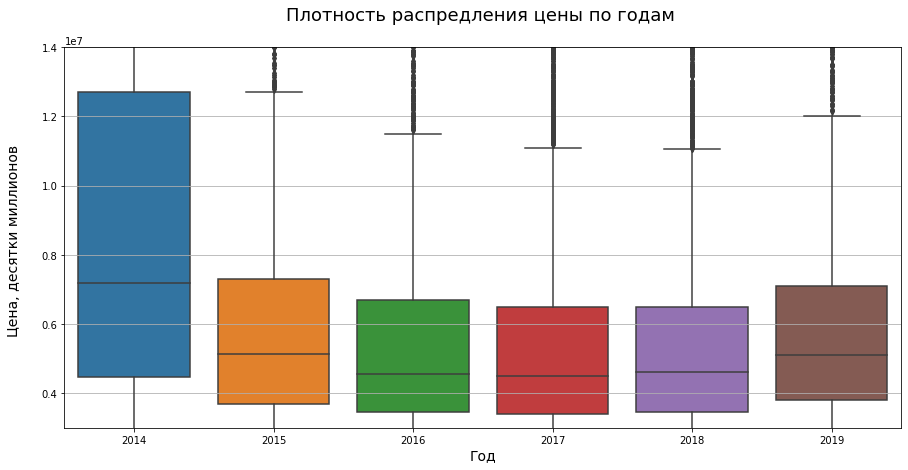

In [164]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='year').set_title('Плотность распредления цены по годам \n', fontsize = 18)
plt.ylim([3_000_000, 14_000_000])
plt.xlabel('Год', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

In [165]:
p_table('month')

,count,price_mean,price_median
month,,,
1,1397,5.867936e+06,4600000.0
2,2485,5.832270e+06,4650000.0
3,2440,5.720717e+06,4667500.0
4,2238,5.864630e+06,4800000.0
5,1193,5.864128e+06,4500000.0
6,1666,5.643957e+06,4400000.0
7,1573,5.740602e+06,4650000.0
8,1636,5.903680e+06,4600000.0
9,1877,5.915216e+06,4700000.0


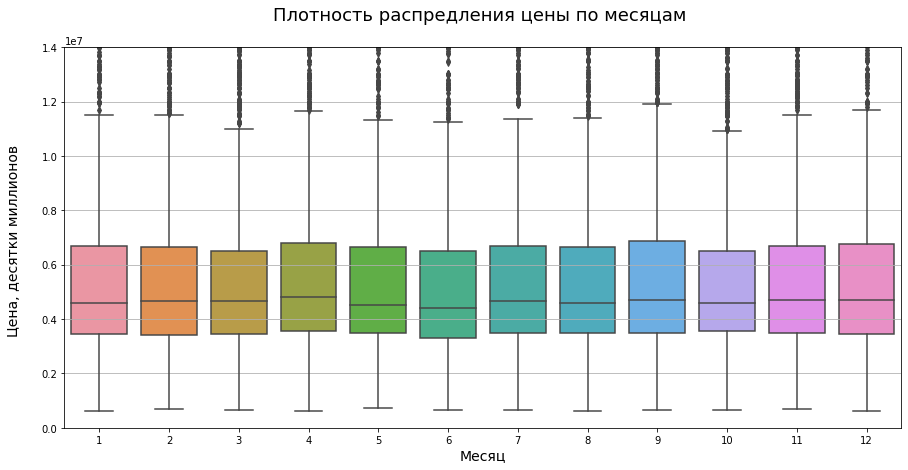

In [166]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='month').set_title('Плотность распредления цены по месяцам \n', fontsize = 18)
plt.ylim([0, 14_000_000])
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

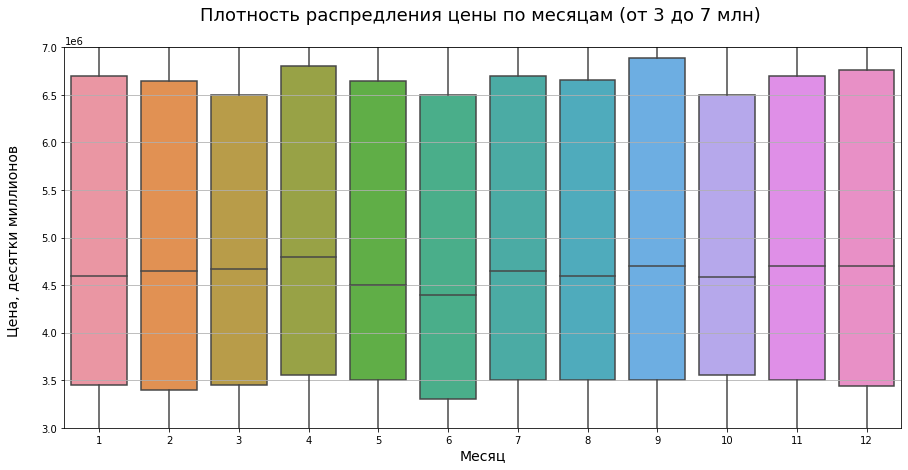

In [167]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='month').set_title('Плотность распредления цены по месяцам (от 3 до 7 млн) \n', fontsize = 18)
plt.ylim([3_000_000, 7_000_000])
plt.xlabel('Месяц', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

In [168]:
p_table('weekday')

,count,price_mean,price_median
weekday,,,
0,3403,5.850675e+06,4650000.0
1,3914,5.805996e+06,4750000.0
2,3738,5.920545e+06,4700000.0
3,4011,5.922450e+06,4650000.0
4,3794,5.732587e+06,4594500.0
5,1832,5.602003e+06,4600000.0
6,1599,5.703930e+06,4550000.0


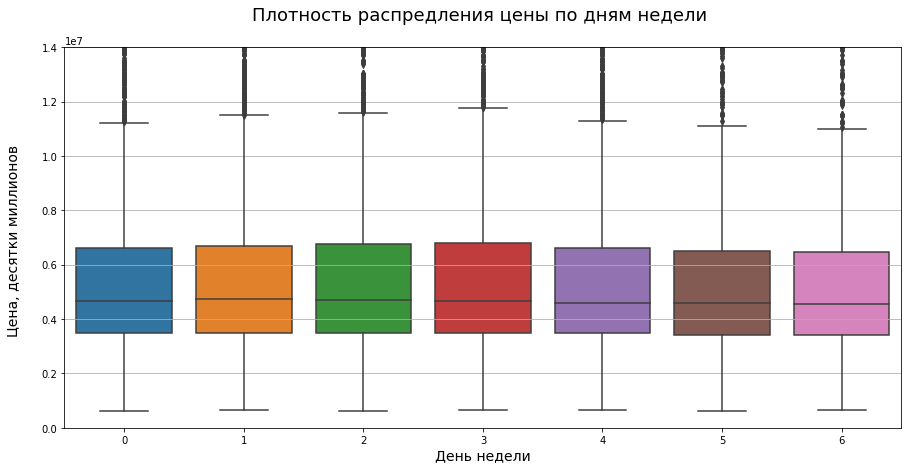

In [169]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='weekday').set_title('Плотность распредления цены по дням недели \n', fontsize = 18)
plt.ylim([0, 14_000_000])
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

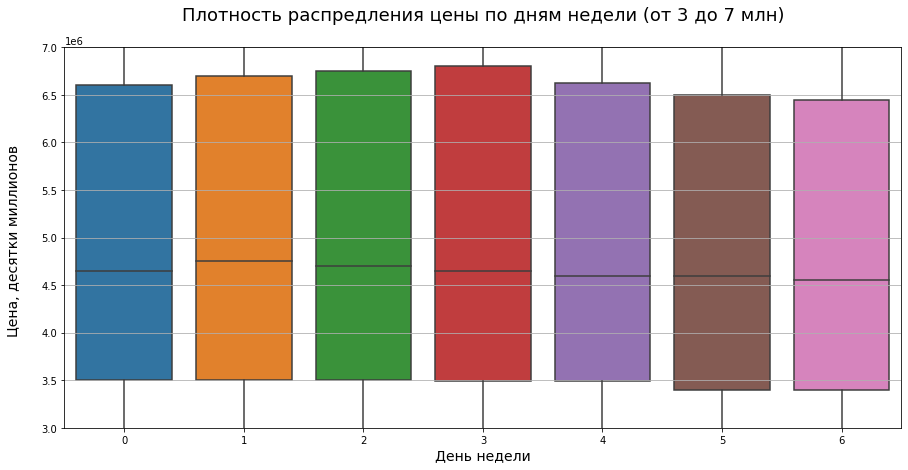

In [170]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='last_price', x='weekday').set_title('Плотность распредления цены по дням недели (от 3 до 7 млн)\n', 
                                                            fontsize = 18)
plt.ylim([3_000_000, 7_000_000])
plt.xlabel('День недели', fontsize=14)
plt.ylabel('Цена, десятки миллионов \n', fontsize=14);

In [171]:
table = df.pivot_table(index='year', values='total_area', aggfunc=['count', 'mean', 'median'])
table.columns = ['count', 'area_mean', 'area_median']
table.reset_index(inplace=True)

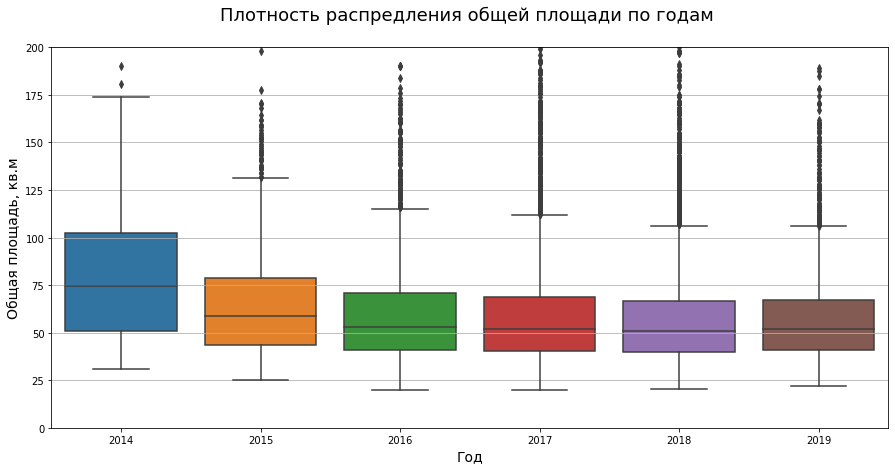

In [172]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='total_area', x='year').set_title('Плотность распредления общей площади по годам \n', 
                                                          fontsize = 18)
plt.ylim([0, 200])
plt.xlabel('Год', fontsize=14)
plt.ylabel('Общая площадь, кв.м', fontsize=14);

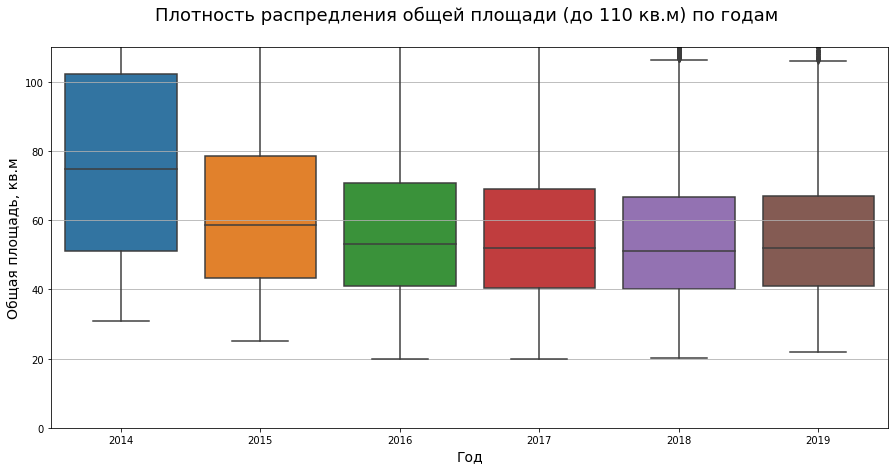

In [173]:
plt.subplots(figsize=(15, 7))
plt.grid(visible=True, axis='y')
sns.boxplot(data=df, y='total_area', x='year').set_title('Плотность распредления общей площади (до 110 кв.м) по годам \n', 
                                                          fontsize = 18)
plt.ylim([0, 110])
plt.xlabel('Год', fontsize=14)
plt.ylabel('Общая площадь, кв.м', fontsize=14);

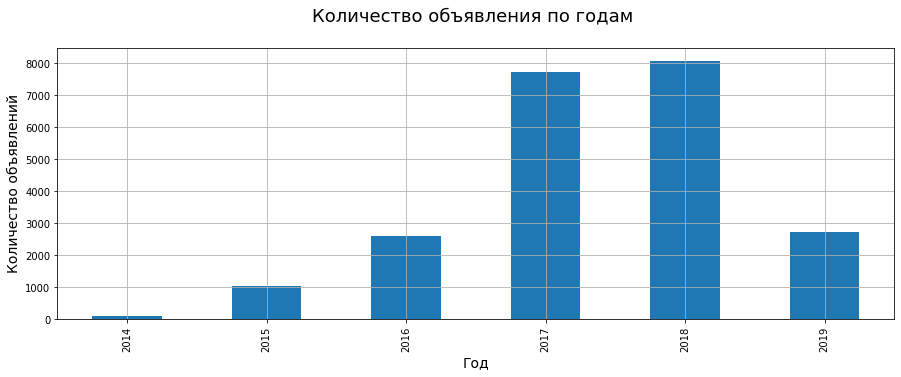

In [174]:
table.plot(kind='bar', 
           x='year', 
           y='count', 
           figsize=(15,5),
           legend=False,
           grid=True).set_title('Количество объявления по годам \n', fontsize = 18)
plt.xlabel('Год', fontsize=14)
plt.ylabel('Количество объявлений', fontsize=14);

Изучив взаимосвязь цены и:

- общей площади
- жилой площади
- площади кухни
- количества комнат
- этажа, на котором расположена квартира (первый, последний, другой)
- даты размещения (день недели, месяц, год)

можно сделать следующие выводы: 

- цена объекта ожидаемо напрямую зависит от общей площади, чем больше площадь, тем выше цена
- цена объекта зависит от жилой площади, чем больше площадь, тем выше цена. С ростом цены корреляция слабеет
- цена объекта зависит от площади кухни, чем больше площадь, тем выше цена. С ростом цены корреляция слабеет
- количество комнат ожидаемо влияет на цену, чем меньше комнат, тем меньше цена
- больше всего продают двух- и однокомнатные квартиры
- квартиры на первом этаже стоят заметно дешевле, чем квартиры на последнем этаже, а те в свою очередь, чем квартиры на других этажах
- в 2014 году было очень малое количество объявлений (размещать объявления стало возможным только в конце 2014 г.), что затрудняет сравнение с другими годами
- наблюдаем рост числа объявлений с 2014 по 2018 год, вероятно это связано с ростом популярности сервиса
- в 2019 году объявлений меньше чем в 2017-2018 годах, вероятно предоставленные данные за неполный год
- с 2016 по 2019 год наблюдается тенденция к росту цены на жилье
- с увеличением количества записей по годам медианная стоимость уменьшается, а средняя увеличивается
- площадь продаваемых квартир с годами становится меньше 
- продажи квартир имеют выраженную сезонность - с февраля по апрель(включительно) и с сентября по ноябрь чаще выставляют на продажу 
- самый спокойный в плане продаж месяц - май, самый активный - февраль
- максимальные цены на квартиры выставляют в декабре
- цена не зависит от дня недели
- в выходные объявления о продаже публикуются реже.

#### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [175]:
table = df.pivot_table(index='locality_name', values='square_meter_cost', aggfunc=['count', 'mean'])
table.columns = ['entries_num', 'mean']
table.reset_index(inplace=True)
table['mean'] = table['mean'].round(2)
table.sort_values(by='entries_num', ascending=False).head(10)

,locality_name,entries_num,mean
33,Санкт-Петербург,14832,111225.19
197,поселок Мурино,481,84583.68
255,поселок Шушары,429,78098.65
3,Всеволожск,381,68832.58
32,Пушкин,357,102919.59
13,Колпино,335,75222.71
204,поселок Парголово,318,90364.38
6,Гатчина,277,68823.57
77,деревня Кудрово,264,91948.02
4,Выборг,210,58451.52


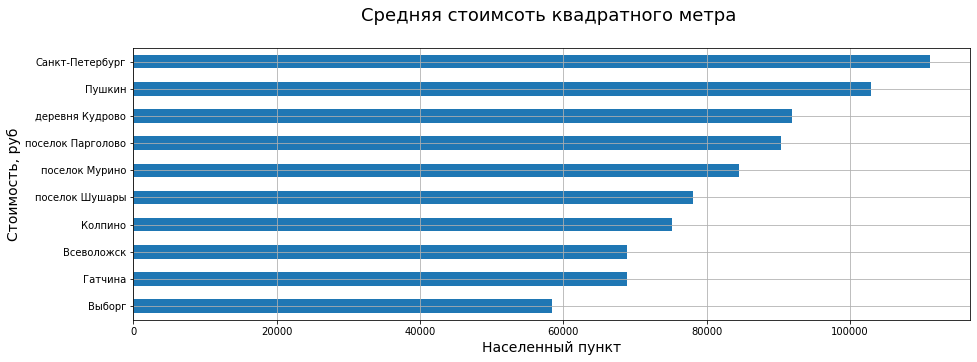

In [176]:
table.sort_values(by='entries_num', ascending=False).head(10).sort_values(by='mean', ascending=True).plot(
    kind='barh', 
    x='locality_name', 
    y='mean', 
    figsize=(15,5),
    legend=False,
    grid=True).set_title('Средняя стоимсоть квадратного метра \n', fontsize = 18)
plt.xlabel('Населенный пункт', fontsize=14)
plt.ylabel('Стоимость, руб', fontsize=14);

Из населённых пунктов с наибольшим числом объявлений, самая выскоая цена квадратного метра в Санкт-Петербурге - 111225.19, самая низкая - в Выборге - 58451.52

#### Cредняя стоимость на разном удалении от центра

In [177]:
spb = df.query('locality_name == "Санкт-Петербург"')
spb.shape

(14832, 29)

In [178]:
spb_pivot = spb.pivot_table(index='city_center_nearest_km', values='last_price', aggfunc=['count', 'mean', 'median'])
spb_pivot.columns = ['count', 'price_mean', 'price_median']
spb_pivot.reset_index(inplace= True)

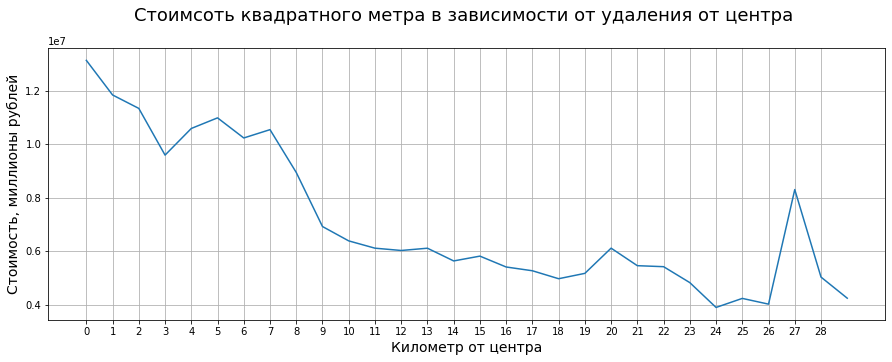

In [179]:
(
    spb_pivot.plot(x='city_center_nearest_km', y='price_mean', kind='line', figsize=(15,5), grid=True, legend=False)
     .set_title('Стоимсоть квадратного метра в зависимости от удаления от центра \n', fontsize = 18)
)
plt.xticks(range(0, 29, 1))
plt.xlabel('Километр от центра', fontsize=14)
plt.ylabel('Стоимость, миллионы рублей', fontsize=14);

In [180]:

table = (
    spb.query('city_center_nearest_km >= 2 & city_center_nearest_km < = 9')
    .pivot_table(index='floor_type', values='locality_name', columns=['city_center_nearest_km'], aggfunc=['count'])
)
table.columns = table.columns.droplevel(0)
table = table.reset_index().rename_axis(None, axis=1)
for i in range(2,10):
    table[f'percent_{i}km'] = (table[i] / table[i].sum()*100).round(1)
table

,floor_type,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,percent_2km,percent_3km,percent_4km,percent_5km,percent_6km,percent_7km,percent_8km,percent_9km
0,другой,146,185,445,615,398,293,451,437,57.3,60.1,72.1,75.6,75.1,77.3,80.2,76.4
1,первый,41,52,73,75,58,31,49,50,16.1,16.9,11.8,9.2,10.9,8.2,8.7,8.7
2,последний,68,71,99,123,74,55,62,85,26.7,23.1,16.0,15.1,14.0,14.5,11.0,14.9


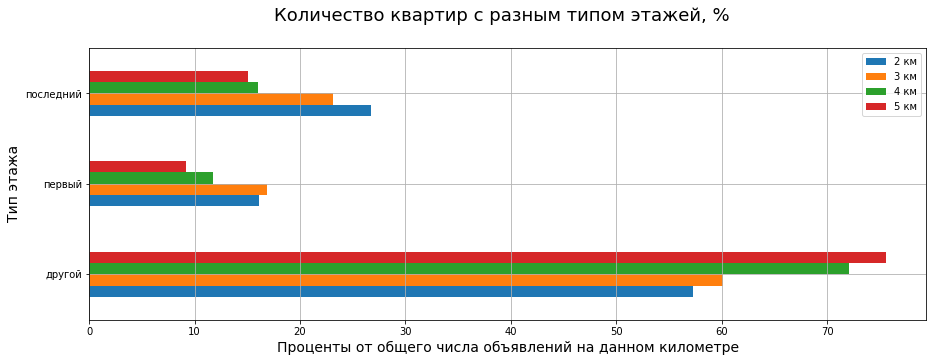

In [181]:
table[['floor_type', 'percent_2km','percent_3km','percent_4km','percent_5km']].plot(
    x='floor_type',
    kind='barh',
    figsize=(15,5),
    grid=True).set_title('Количество квартир с разным типом этажей, %  \n', fontsize = 18)
plt.legend(['2 км','3 км','4 км','5 км'])
plt.ylabel('Тип этажа', fontsize=14)
plt.xlabel('Проценты от общего числа объявлений на данном километре', fontsize=14);

In [182]:
spb.query('city_center_nearest_km == 27')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_type,square_meter_cost,weekday,month,year,floor_type,city_center_nearest_km
748,13,14350000.0,74.0,2017-11-28,2,3.13,5,30.0,3,NaN,...,0.0,NaN,128.0,город,193918.92,1,11,2017,другой,27.0
5961,6,2250000.0,32.0,2018-02-27,1,2.65,2,16.5,2,NaN,...,0.0,NaN,178.0,город,70312.50,1,2,2018,последний,27.0


В таблице и графиках можем наблюдать ожидаемую картину - с удалением от центра, стоимость одного квадратного метра падает.
На графике видим провал и пик между 2 и 5 километром, а так же резкий выброс на 27км.

Провал и пик образуется по нескольким причинам:
- разное количество объявлений (на отметке в 4км уже в два раза больше объявлений)
- разные квартиры по типу этажа, а как мы выяснили ранее, квартиры с типом "другой" в среднем дороже, чем квартиры с другими типами. На отметке 4 и 5 км, "другого" этажа больше на 12 и 15% соответственно.

Выброс на 27 километре образовался из-зз малого количества записей - их всего две.

### Общий вывод

#### Данные

Данные имели множество пропусков в столбцах:

- `'is_apartment'`            (20924)
- `'parks_nearest'`           (15620)
- `'ponds_nearest'`           (14589)
- `'balcony'`                 (11519)
- `'ceiling_height'`           (9195)
- `'airports_nearest'`         (5542)
- `'city_center_nearest'`      (5519)
- `'ponds_around3000'`         (5518)
- `'parks_around3000'`         (5518)
- `'days_exposition'`          (3181)
- `'kitchen_area'`             (2278)
- `'living_area'`              (1903)
- `'floors_total'`               (86)
- `'locality_name'`              (49)

Часть пропусков в столбцах `'airports_nearest'`, `'city_center_nearest'`, `'parks_nearest'`, `'ponds_nearest'`, `'ponds_around3000'`,`'parks_around3000'`связаны друг с другом и скорее всего с некорректной работой геосервиса или передачи данных из геосервиса. Чаще встречаются в городах относящихся к Ленинградской области.

Отдельно встречаются пропуски в столбцах `'parks_nearest'`, `'ponds_nearest'`. Пропуски появляются тогда же, когда значение в `'ponds_around3000'`, `'parks_around3000'` соответственно равны 0. 

Пропуски в столбцах `'balcony'`, `'ceiling_height'`, `'kitchen_area'`, `'living_area'`, `'floors_total'`, `'locality_name'`   скорее всего - не заполненные поля форм от пользователя. 

В данных встречаются аномальные значения в столбцах `'rooms'`, `'ceiling_height'`,	`'floors_total'`,	`'living_area'`, `'days_exposition'`. <br>

Аномальные значения в столбцах `'rooms'`, `'ceiling_height'`,	`'floors_total'` скорее всего результат неправильного ввода и некорректной валидации данных. <br>

В столбце `'locality_name'` встречаются неявные дубликаты типа "посёлок/поселок", а так же идентичный по набору полей записи - вероятно объявления от разных агентств.

#### Исследования и выводы

##### Изучив длительность количество дней, которое объявления находились на сайте узнали, что:
- Среднее количество дней, которое объявление было опубликовано - 174 <br>
- Медиана - 95 дней
- Быстрой можно назвать продажу до 45 дней.
- Долгой - свыше 229.  
- В среднем, продажа квартиры занимает от 45 до 229 дней. 
- Квартиры с меньшим количеством комнат продаются быстрее
- С течением времени, количество неснятых объявлений увеличивается 
- С течением времени, среднее время продажи уменьшается (что впрочем не говорит об увеличении скорости продажи, а только о меньшем количестве неснятых объявлений)

##### Факторы, которые больше всего влияют на общую (полную) стоимость объекта
- цена объекта ожидаемо напрямую зависит от общей площади, чем больше площадь, тем выше цена
- цена объекта зависит от жилой площади, чем больше площадь, тем выше цена. С ростом цены корреляция слабеет
- цена объекта зависит от площади кухни, чем больше площадь, тем выше цена. С ростом цены корреляция слабеет
- количество комнат ожидаемо влияет на цену, чем меньше комнат, тем меньше цена
- больше всего продают двух- и однокомнатные квартиры
- квартиры на первом этаже стоят заметно дешевле, чем квартиры на последнем этаже, а те в свою очередь, чем квартиры на других этажах
- в 2014 году было очень малое количество объявлений (размещать объявления стало возможным только в конце 2014 г.), что затрудняет сравнение с другими годами
- наблюдаем рост числа объявлений с 2014 по 2018 год, вероятно это связано с ростом популярности сервиса
- в 2019 году объявлений меньше чем в 2017-2018 годах, вероятно предоставленные данные за неполный год
- с 2016 по 2019 год наблюдается тенденция к росту цены на жилье
- с увеличением количества записей по годам медианная стоимость уменьшается, а средняя увеличивается
- площадь продаваемых квартир с годами становится меньше 
- продажи квартир имеют выраженную сезонность - с февраля по апрель(включительно) и с сентября по ноябрь чаще выставляют на продажу 
- самый спокойный в плане продаж месяц - май, самый активный - февраль
- максимальные цены на квартиры выставляют в декабре
- цена не зависит от дня недели
- в выходные объявления о продаже публикуются реже.

##### Cредняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений
Из населённых пунктов с наибольшим числом объявлений: 
- самая высокая цена квадратного метра в Санкт-Петербурге - 111225.19 
- самая низкая - в Выборге - 58451.52

##### Cредняя стоимость на разном удалении от центра
- средняя стоимость жилья падает при удалении от центра города, однако может отличаться от района к району.

В средних значениях есть провалы и пики.

Провал и пик образуется по нескольким причинам:
- разное количество объявлений (на отметке в 4км уже в два раза больше объявлений)
- разные квартиры по типу этажа, а как мы выяснили ранее, квартиры с типом "другой" в среднем дороже, чем квартиры с другими типами. На отметке 4 и 5 км, "другого" этажа больше на 12 и 15% соответственно.

Выброс на 27 километре образовался из-зз малого количества записей - их всего две.

#### Рекомендации

- необходима валидация пользовательских форм на сайте в столбцах где были допущены пропуски, проявились аномальные значения и дубликаты
- есть необходимость проверки взаимодействия геосервиса и сайта, особенно в случае получения данных о населённых пунктах Ленинградской области
- возможно, стоит добавить выбор административного района города Санкт-Петербурга при регистрации объявления или его автоматическое определение в зависимости от улицы